# Insurance Claim Fraud Detection

In [49]:
# Import necessary Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [50]:
# Load dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [51]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1000
No of Columns: 40


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [52]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

### Statistical Analysis

#### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [53]:
# This will check if any duplicate entry or duplicate row with same policy_number
df.duplicated('policy_number').sum() 

0

##### Let check if any whitespace, 'NA' or '-' exist in dataset.

In [54]:
df.isin([' ','NA','-']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [55]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

As we can see collision_type, property_damage, police_report_available having some ? in this columns.

Let replace '?' with np.NaN

In [56]:
df=df.replace('?',np.NaN)

### Missing value check

In [57]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
authorities_contacted                    91             9.1
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
total_claim_amount                        0             0.0
injury_claim                            

<b>Comment :</b>
1. 'property_damage','police_report_available','collision_type' contain missing values.

2. _c39 columns with 100 % null value. We gone drop it.

3. Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

### Missing value imputation

In [58]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
# df['authorities_contacted'].fillna(df['authorities_contacted'].mean()[0], inplace = True)

In [59]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number', 'authorities_contacted'],axis=1,inplace=True)

Here we droped 5 columns which are having more number of missing value and there is no use in our further analysis. 

#### Missing value check after imputation

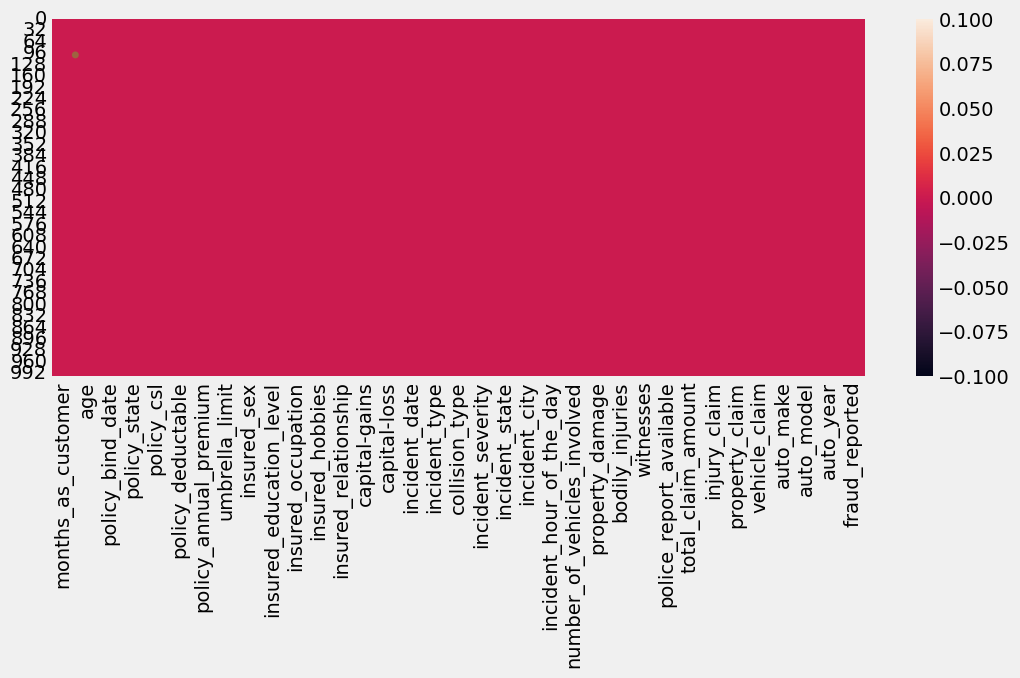

In [60]:
# Heatmap of missing value
sns.heatmap(df.isnull())
plt.show()

In [61]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

<b>Comment :</b>

Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!

<b>Something details on Policy_csl column :</b>
1. Combined single limit (CSL): CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.
    
2. In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
    
3. We will split this column into two CSL columns for person and accident.

In [62]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [63]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

##### We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.

In [64]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [65]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [66]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [67]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

##### We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.

##### As incident year is 2015, we will use 2015 as base year for new column creation.

In [68]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']

# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

#### Spliting feature in categorical and numerical variable

In [69]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [70]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

#### Statistical Matrix

In [71]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [72]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

##### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [73]:
for i in Category:
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games 

#### Start exploring Target variable

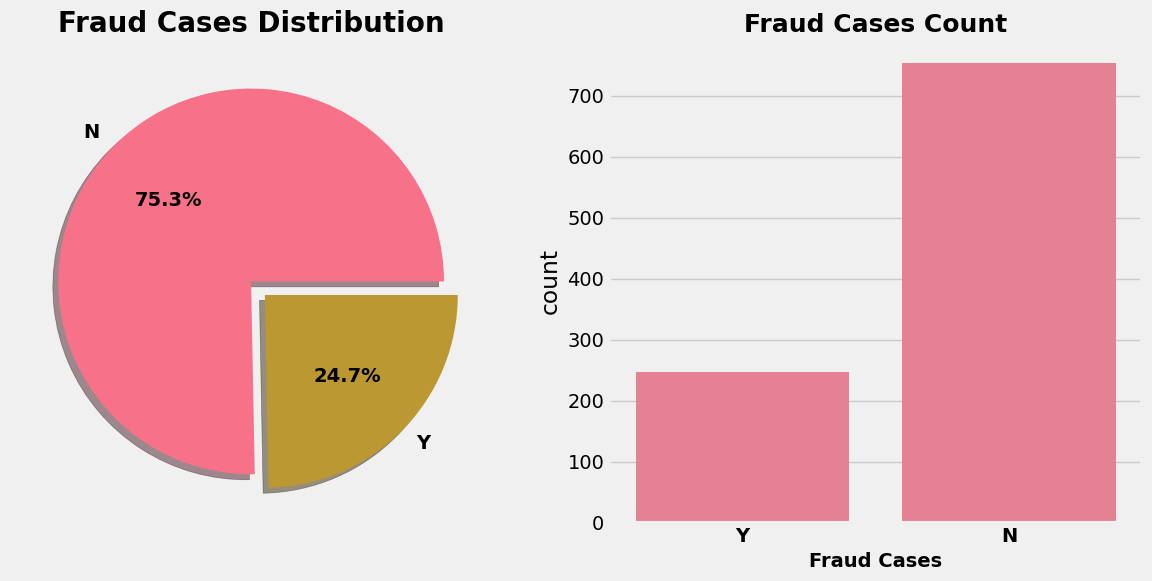

In [74]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f, ax = plt.subplots(1, 2, figsize=(12, 6))
df['fraud_reported'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 14},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Fraud Cases Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='fraud_reported', data=df, ax=ax[1])
ax[1].set_title('Fraud Cases Count', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Fraud Cases", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.show()

<b>Observation:</b>

1. Out of all cases around 24.7 % cases are Fraud.

2. 'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

##### Start Exploring target variable against Independent features to gain more insight.

### Analysing Age vs Fraud

In [75]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


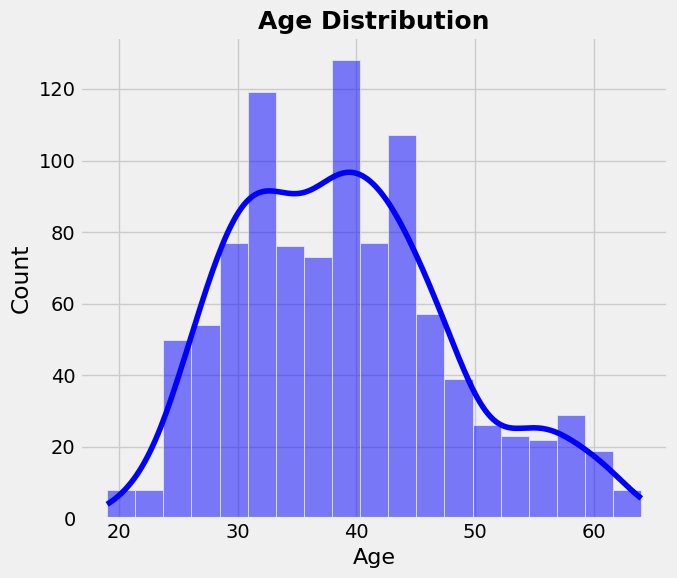

In [76]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [77]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

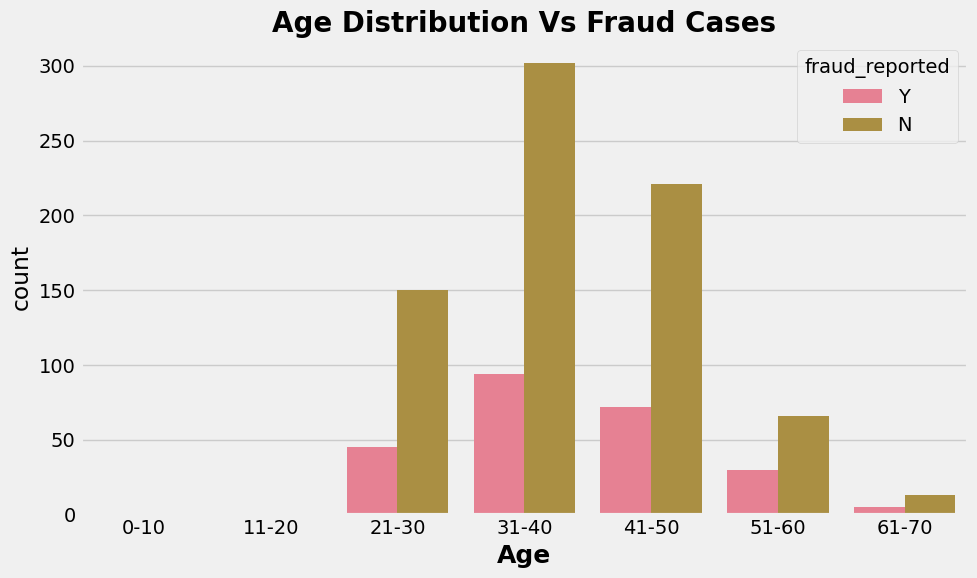

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

In [79]:
df.drop("age_bins",axis=1,inplace=True)

<b>Observation:</b>

1. Maximum fraud cases comes from people with age group of 31-50 year.

2. Very few cases in 60+ year old peoples.

### Policy State Vs Fraud cases

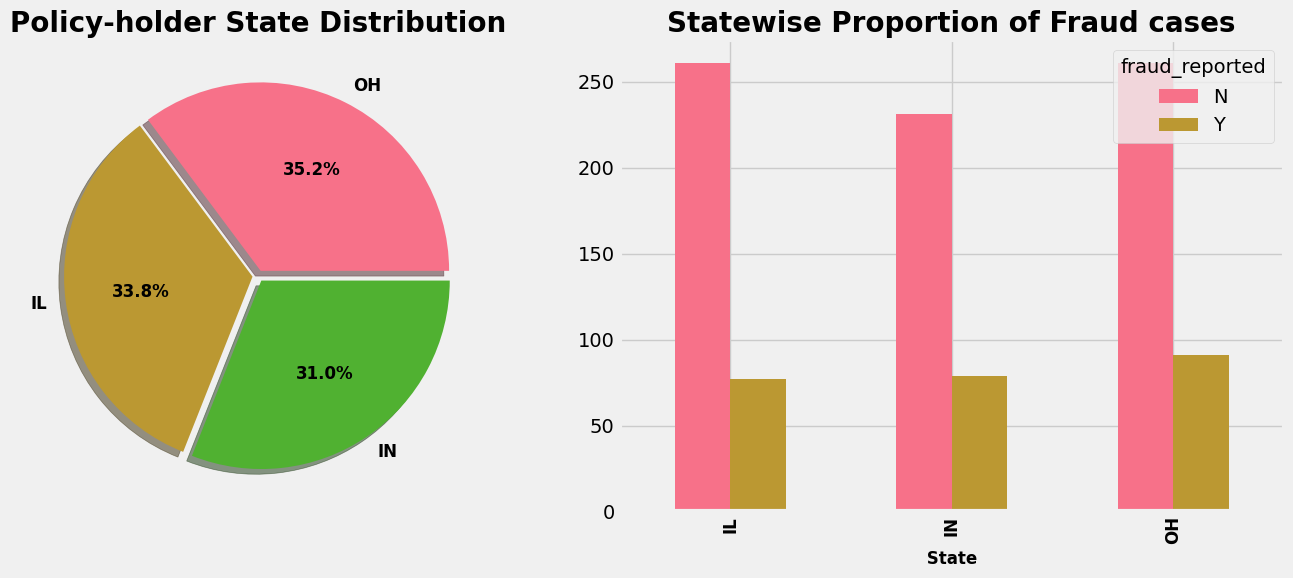

In [80]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(14,6))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=12,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

<b>Observation:</b>

1. Almost same amout of cases come from each state.

2. Maximum fraud cases come from state of Ohio.

### Insured Gender VS Fraud cases

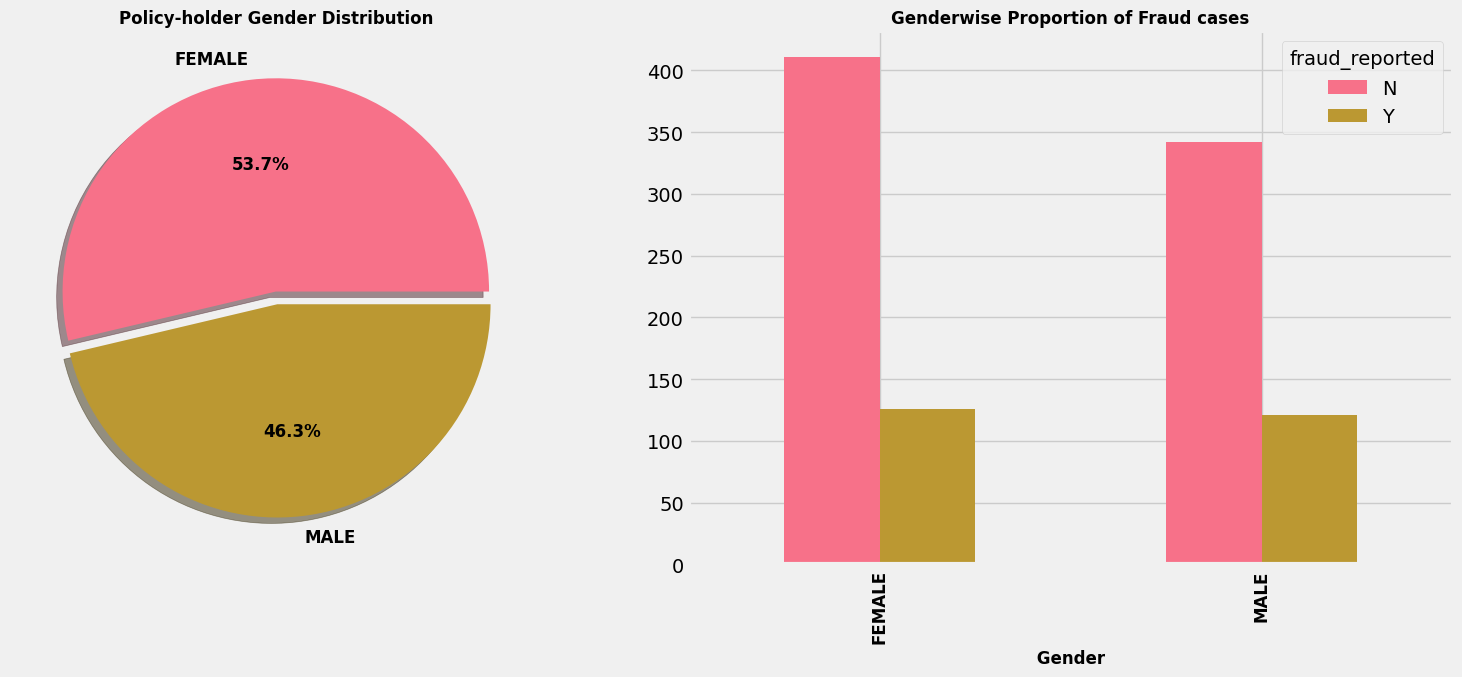

In [81]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=12,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=12,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=12,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

<b>Comment :</b>

1. Number of claims come from female is higher than which reported by male insured.
    
2. Almost same amount of fraud cases comes from same gender.

### Education_level vs Fraud cases

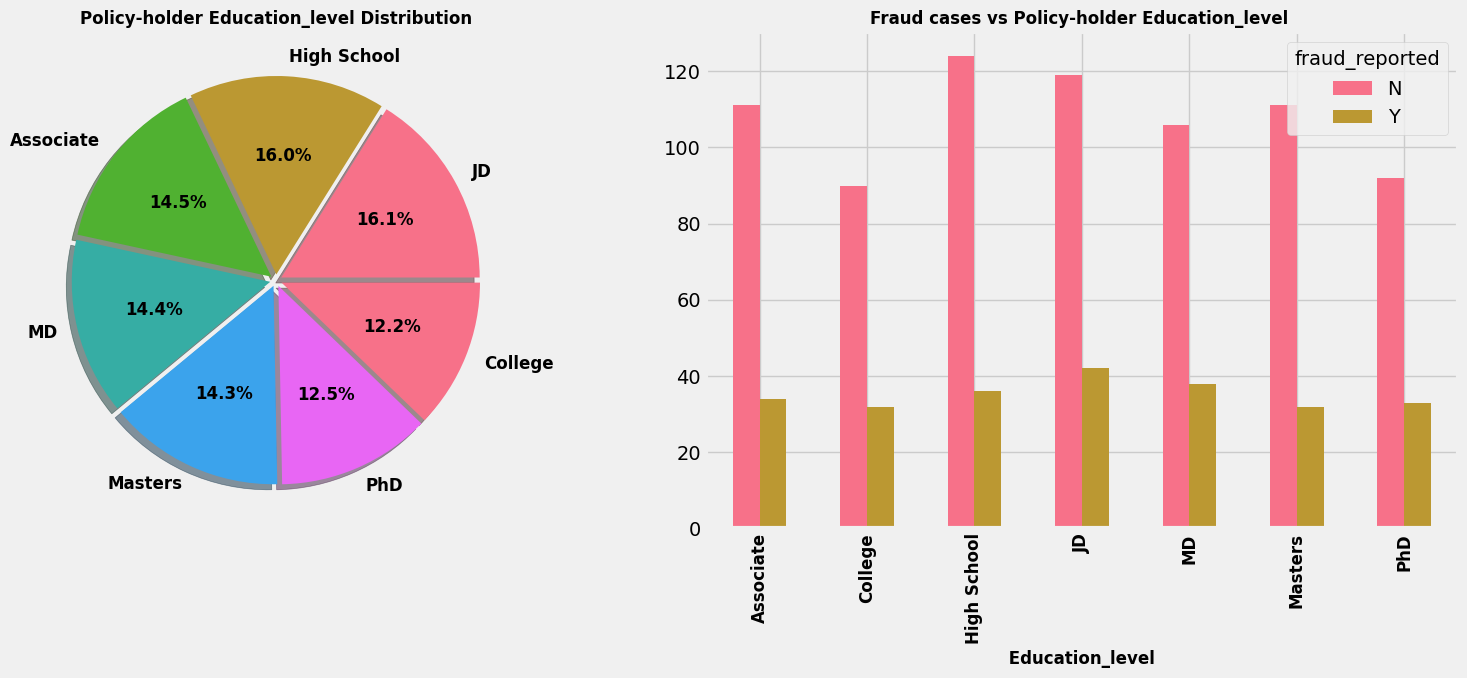

In [82]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=12,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=12,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=12,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

<b>Comment :</b>

We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. Education Level is not much important variable for us !!!

### Occupation of Insured Customers

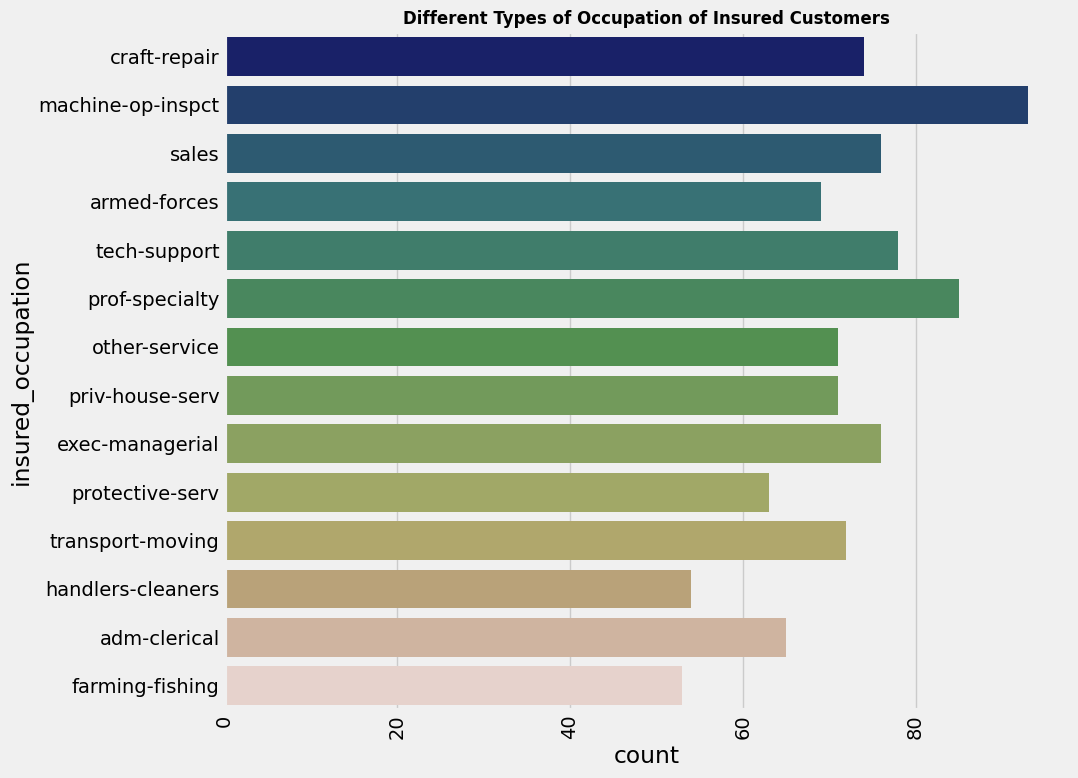

In [83]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=12,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

### Hobbies of Insured Customers

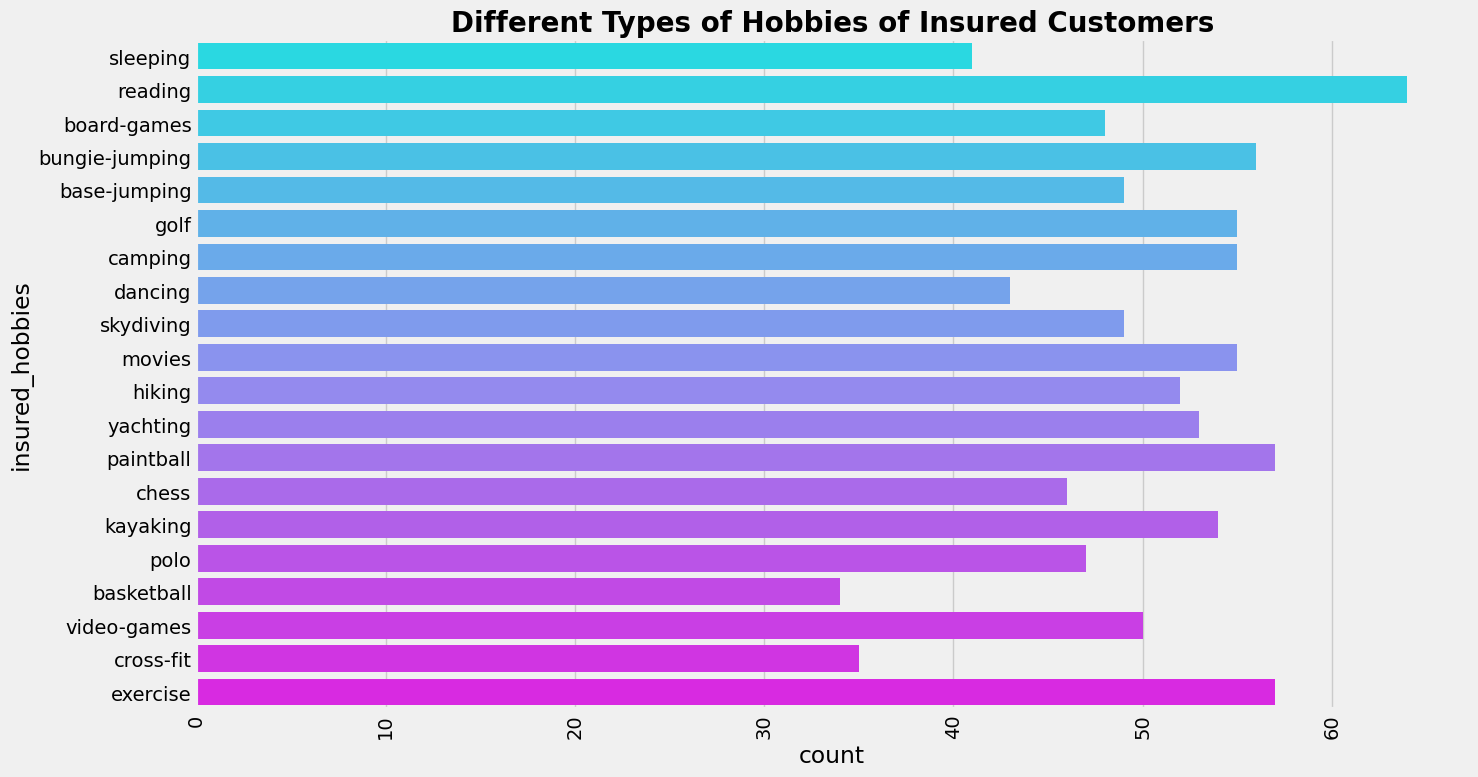

In [84]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

### Different Types of Incidents Vs Fraud cases

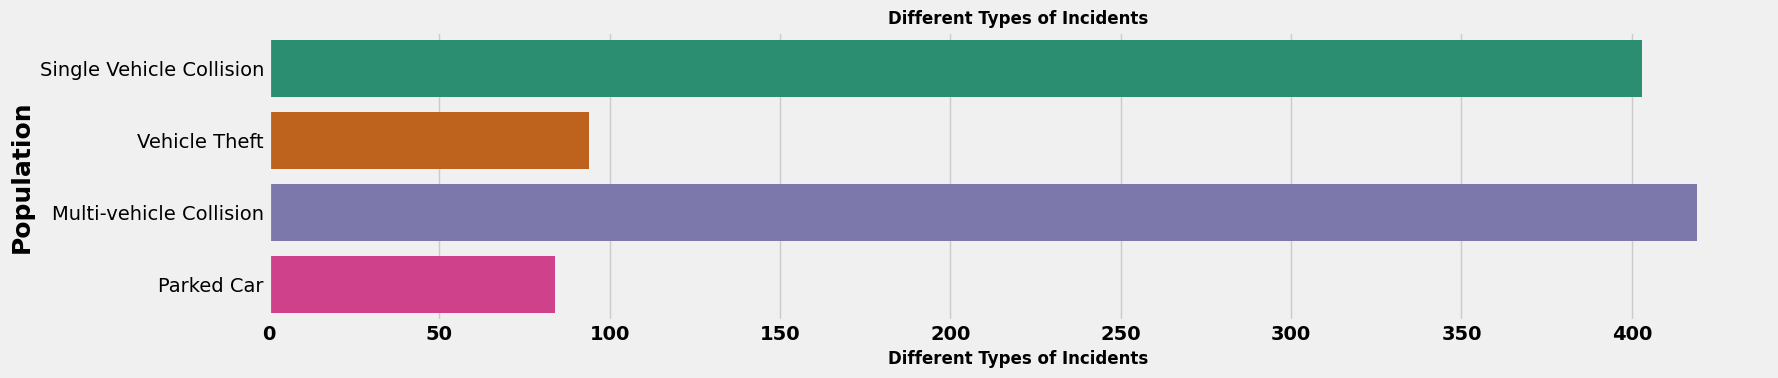

In [85]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (18,4)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=12,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=12,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

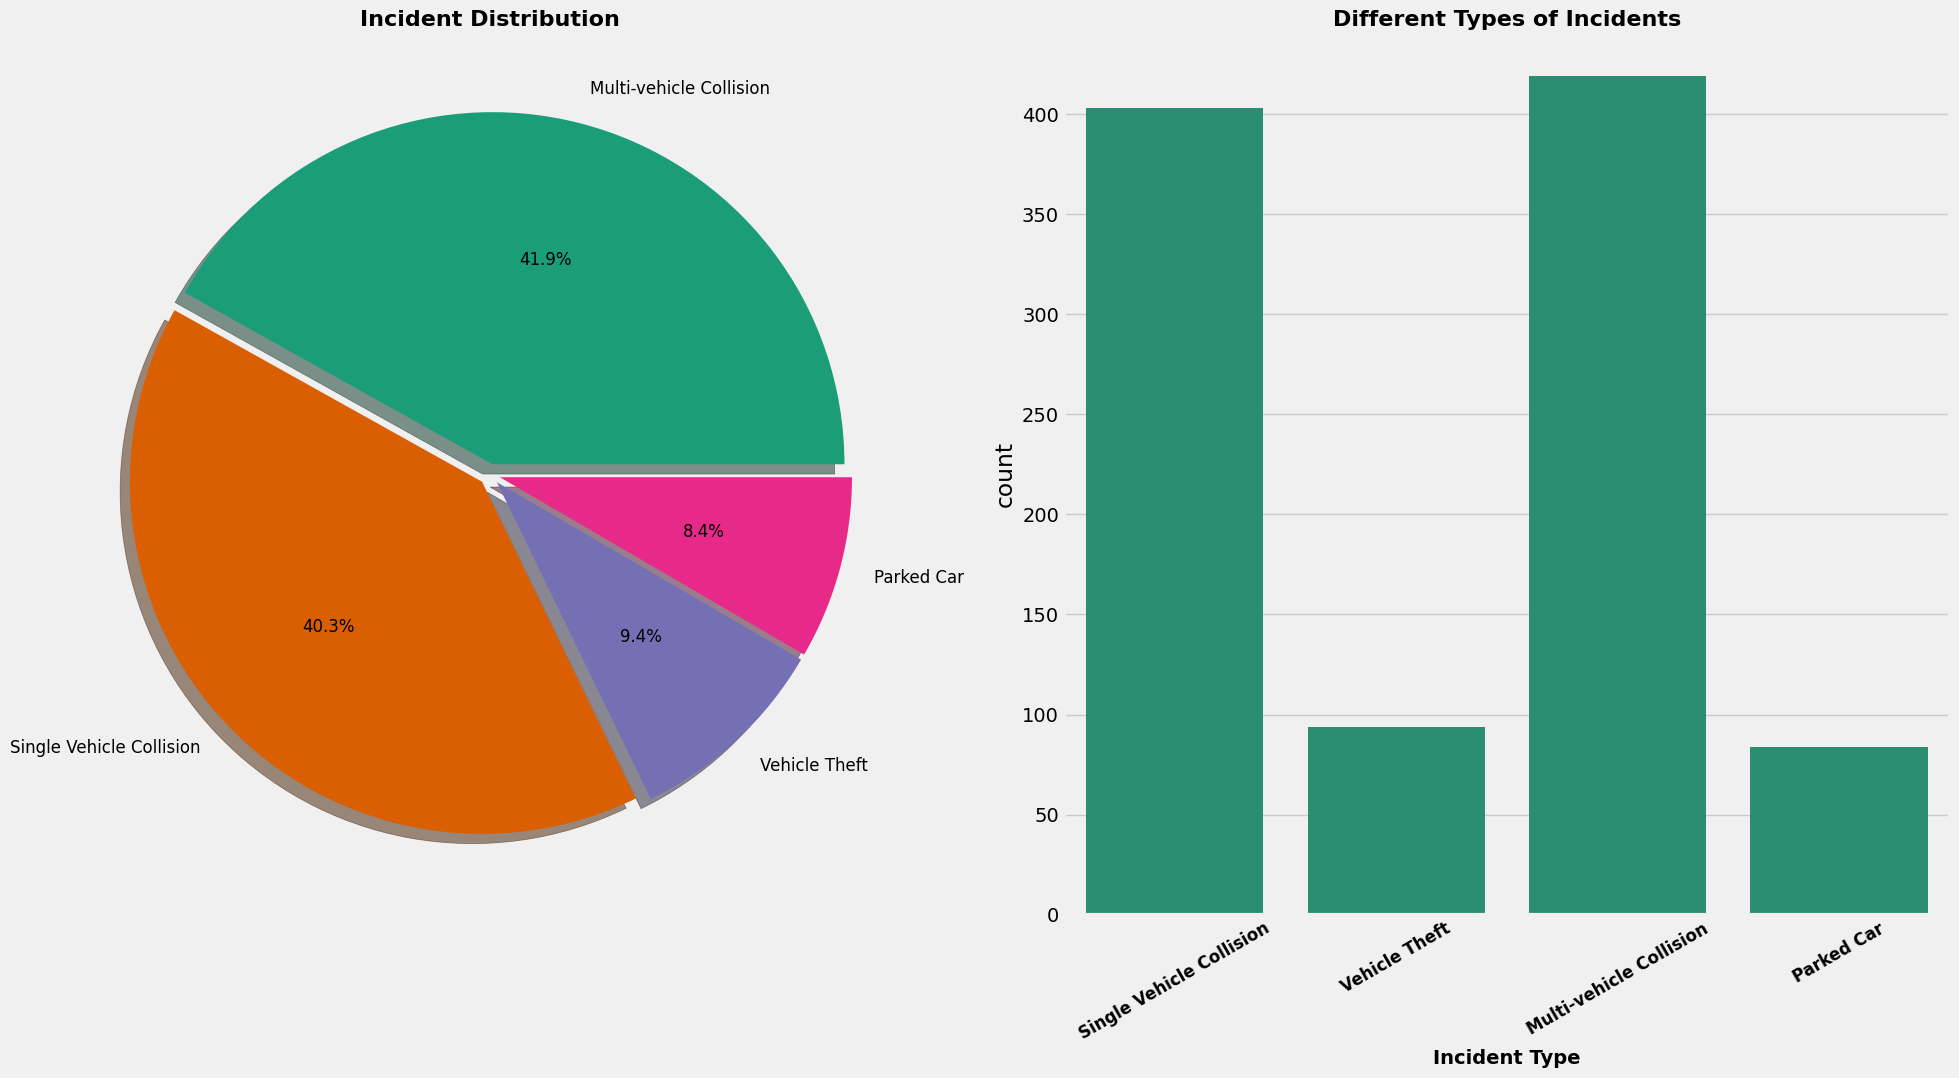

In [86]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f, ax = plt.subplots(1, 2, figsize=(20, 11))
df['incident_type'].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03, 0.03],
    autopct='%3.1f%%',
    textprops={'fontsize': 12},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Incident Distribution', fontsize=16, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='incident_type', data=df, ax=ax[1])
ax[1].set_title('Different Types of Incidents', fontsize=16, fontweight='bold')
ax[1].set_xlabel("Incident Type", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=30, fontweight='bold')

plt.show()

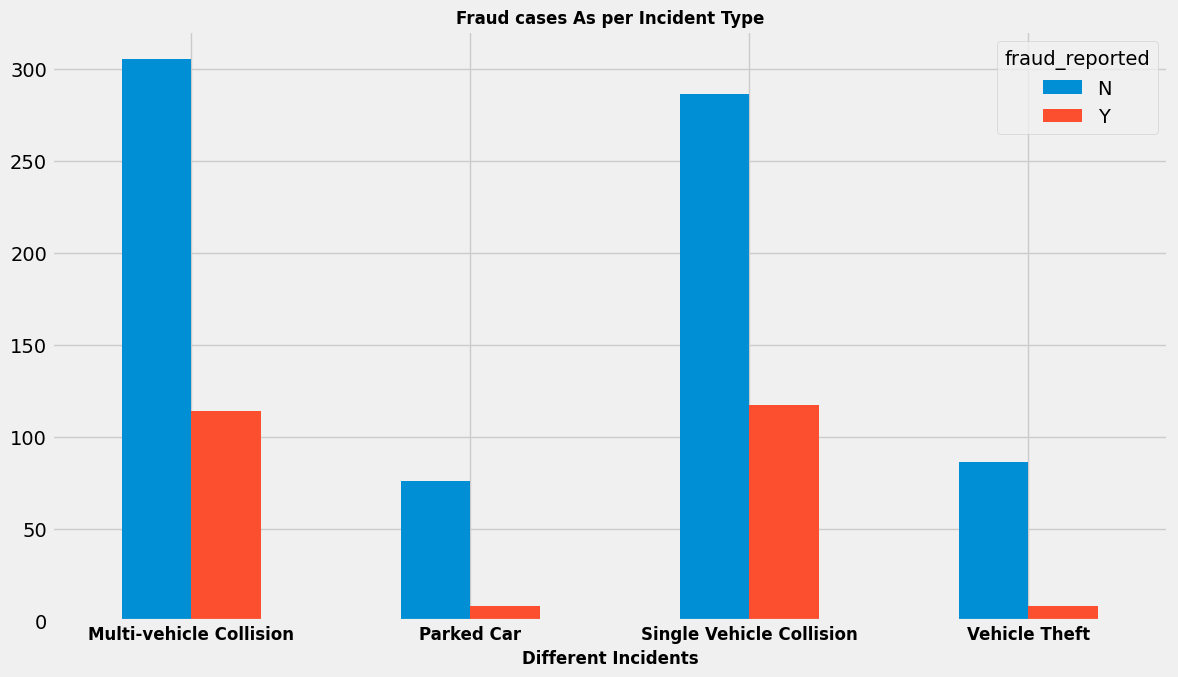

In [87]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=12,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,rotation=0,fontweight ='bold')
plt.show() 

<b>Observation :</b>

1. Most of case comes from Multi-vehicle and single vehicle collision.

2. Some claims are due to automobile robbery.

3. One claim out of three claim is fraud in multi or single vehicle collision incident.

##### It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim.

### Exploration of different Collision

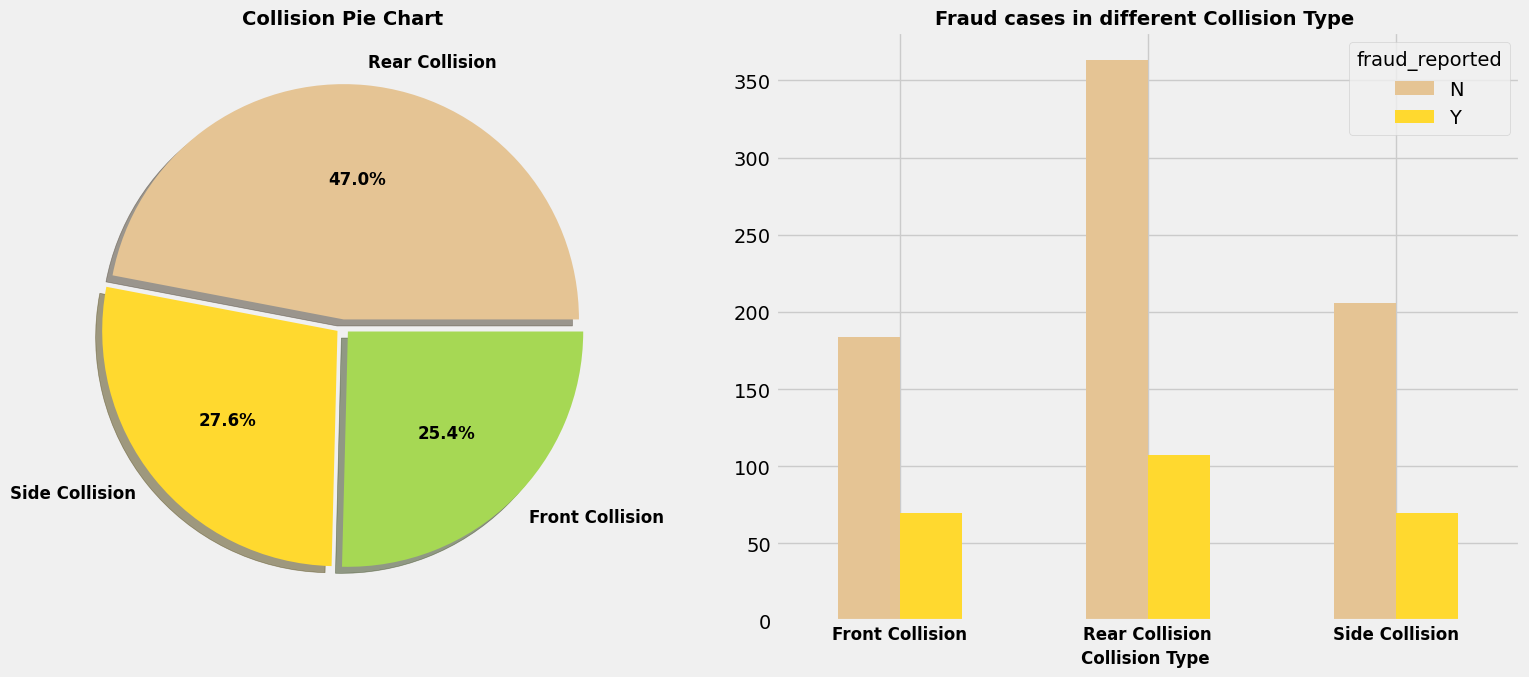

In [88]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=14,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=14,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=12,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

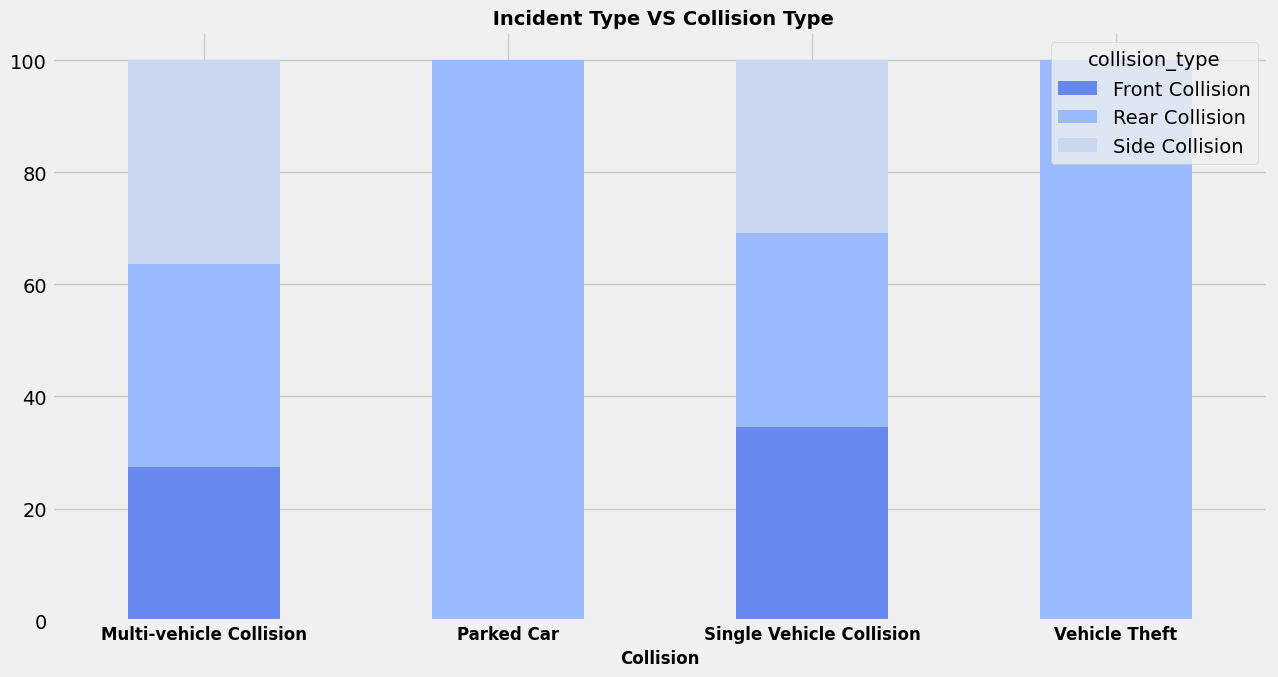

In [89]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=14,fontweight ='bold')
plt.xlabel('Collision', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,rotation=0,fontweight ='bold')
plt.show() 

### Collision VS Incident Severity

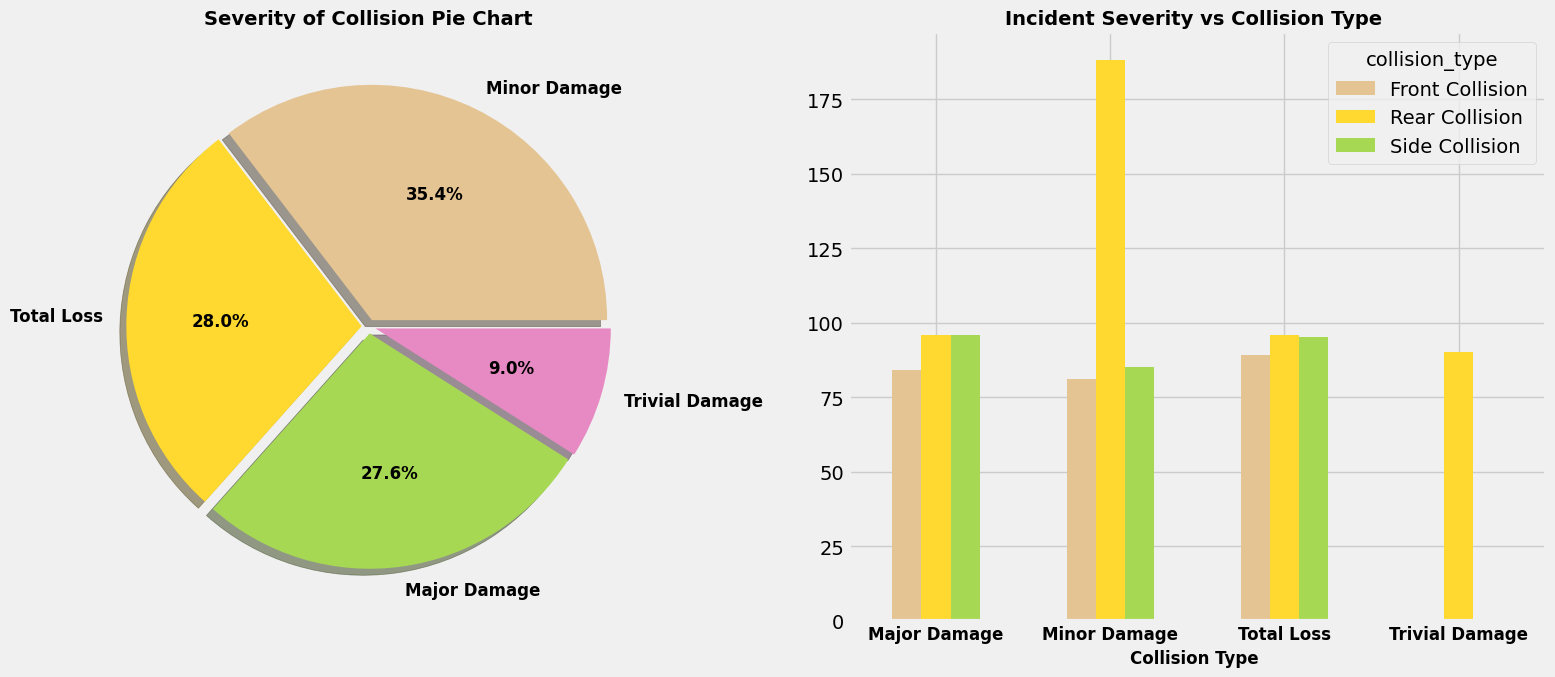

In [90]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=14,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=14,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=12,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

##### Let check another plot of Incident Type VS Severity of collision to gain more insight.

In [91]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

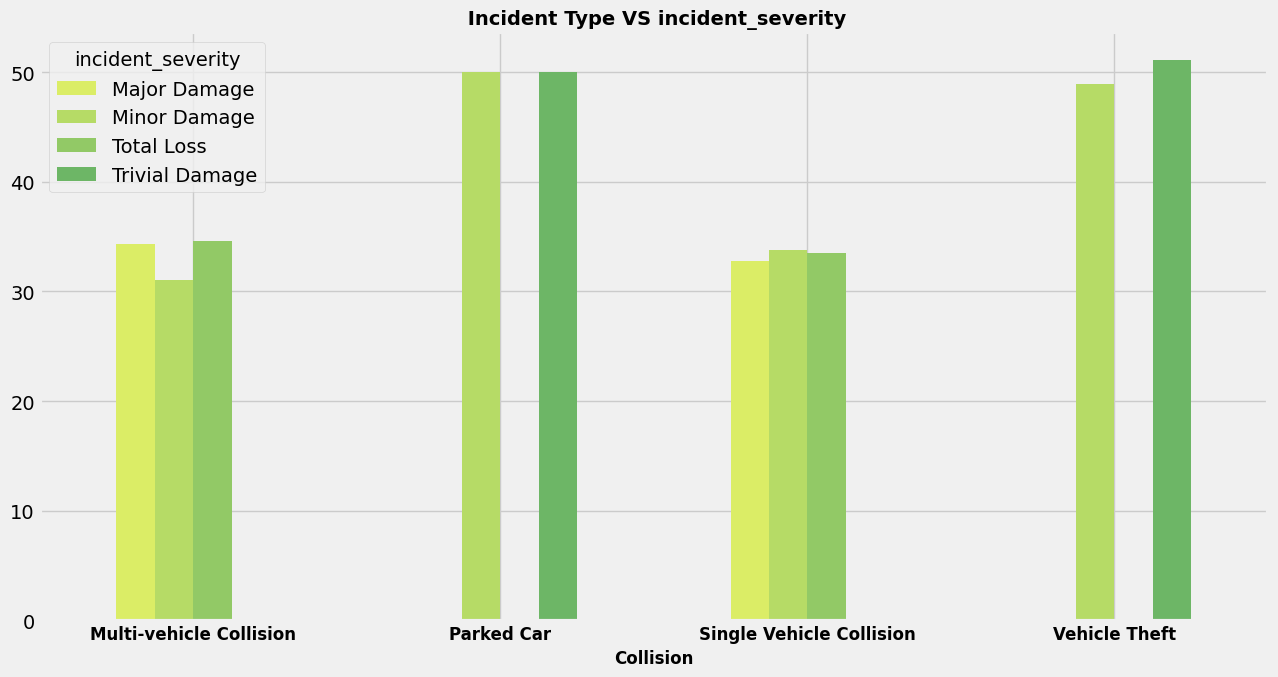

In [92]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=14,fontweight ='bold')
plt.xlabel('Collision', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,rotation=0,fontweight ='bold')
plt.show() 

##### It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

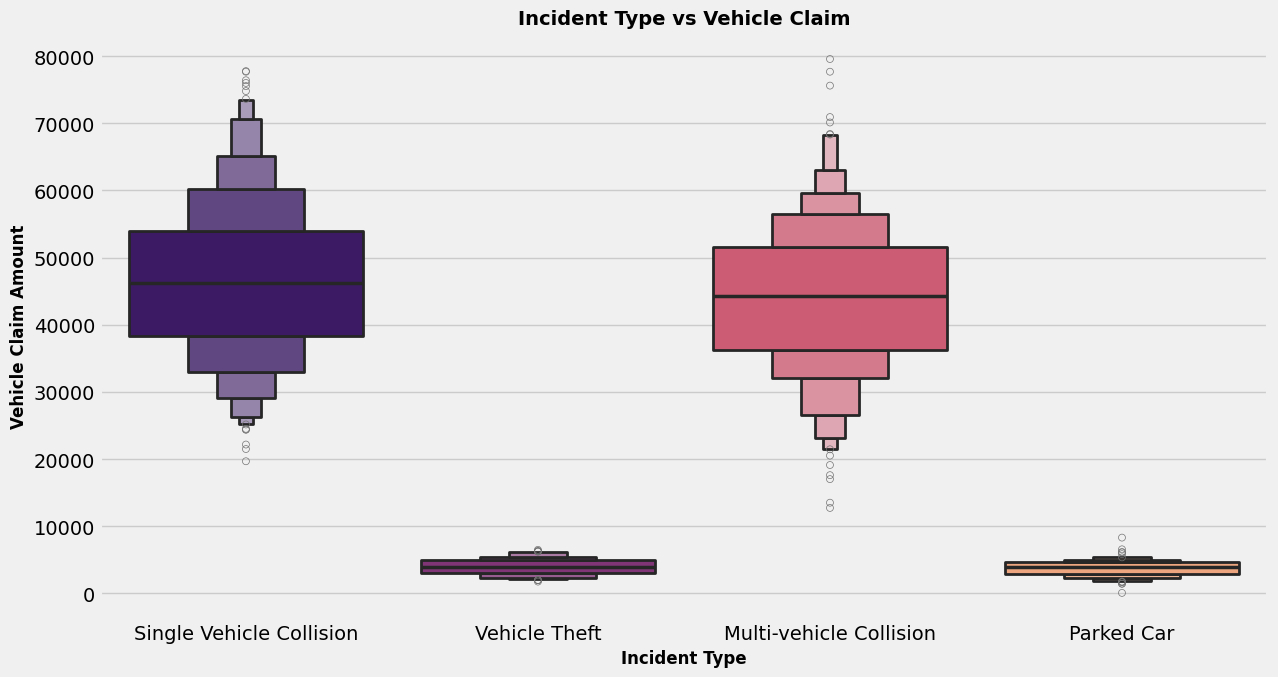

In [93]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(x = df['incident_type'], y = df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=14,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=12,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=12,fontweight='bold')
plt.show()

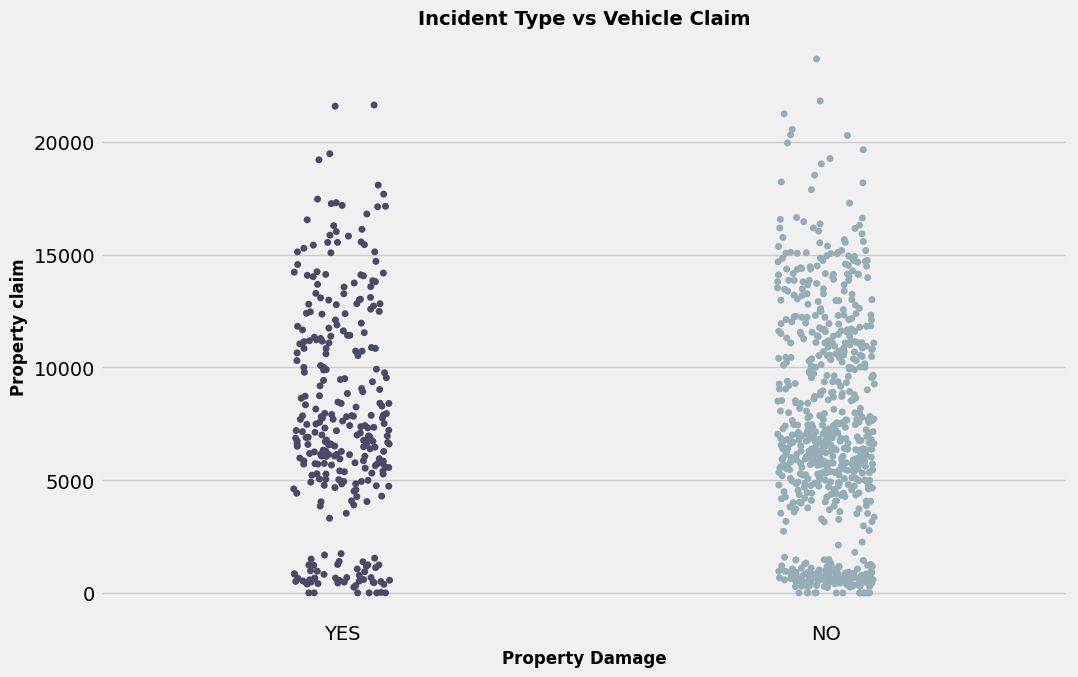

In [94]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(x = df['property_damage'], y = df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=14,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=12,fontweight='bold')
plt.ylabel('Property claim', fontsize=12,fontweight='bold')
plt.show()

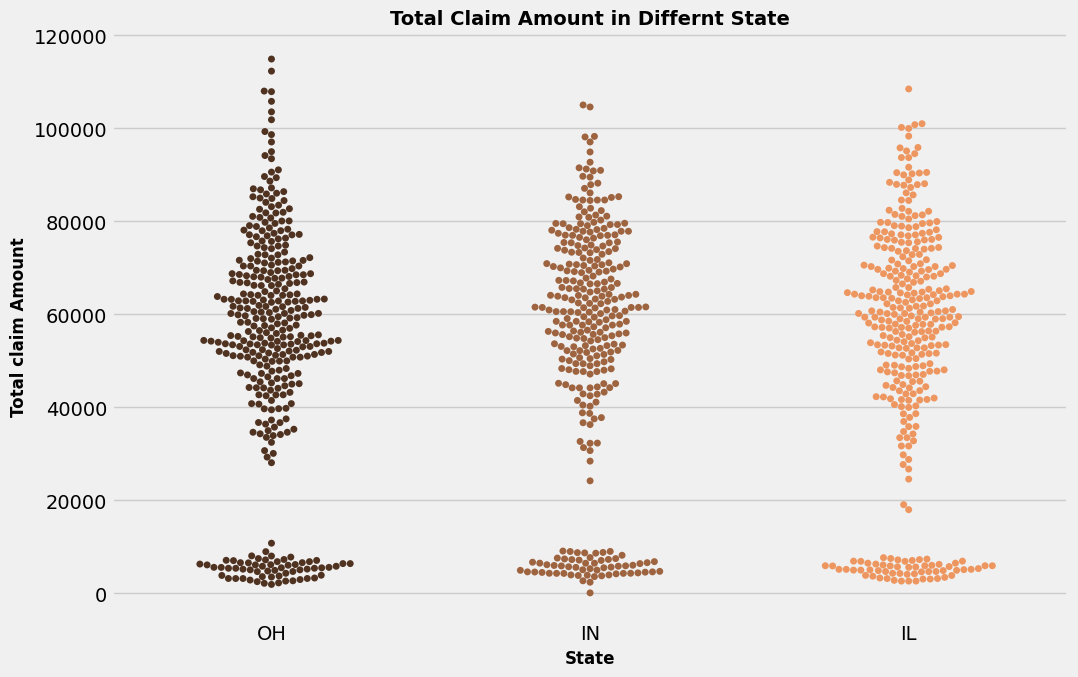

In [95]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(x = df['policy_state'], y = df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=14,fontweight ='bold')
plt.xlabel('State', fontsize=12,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=12,fontweight='bold')
plt.show()

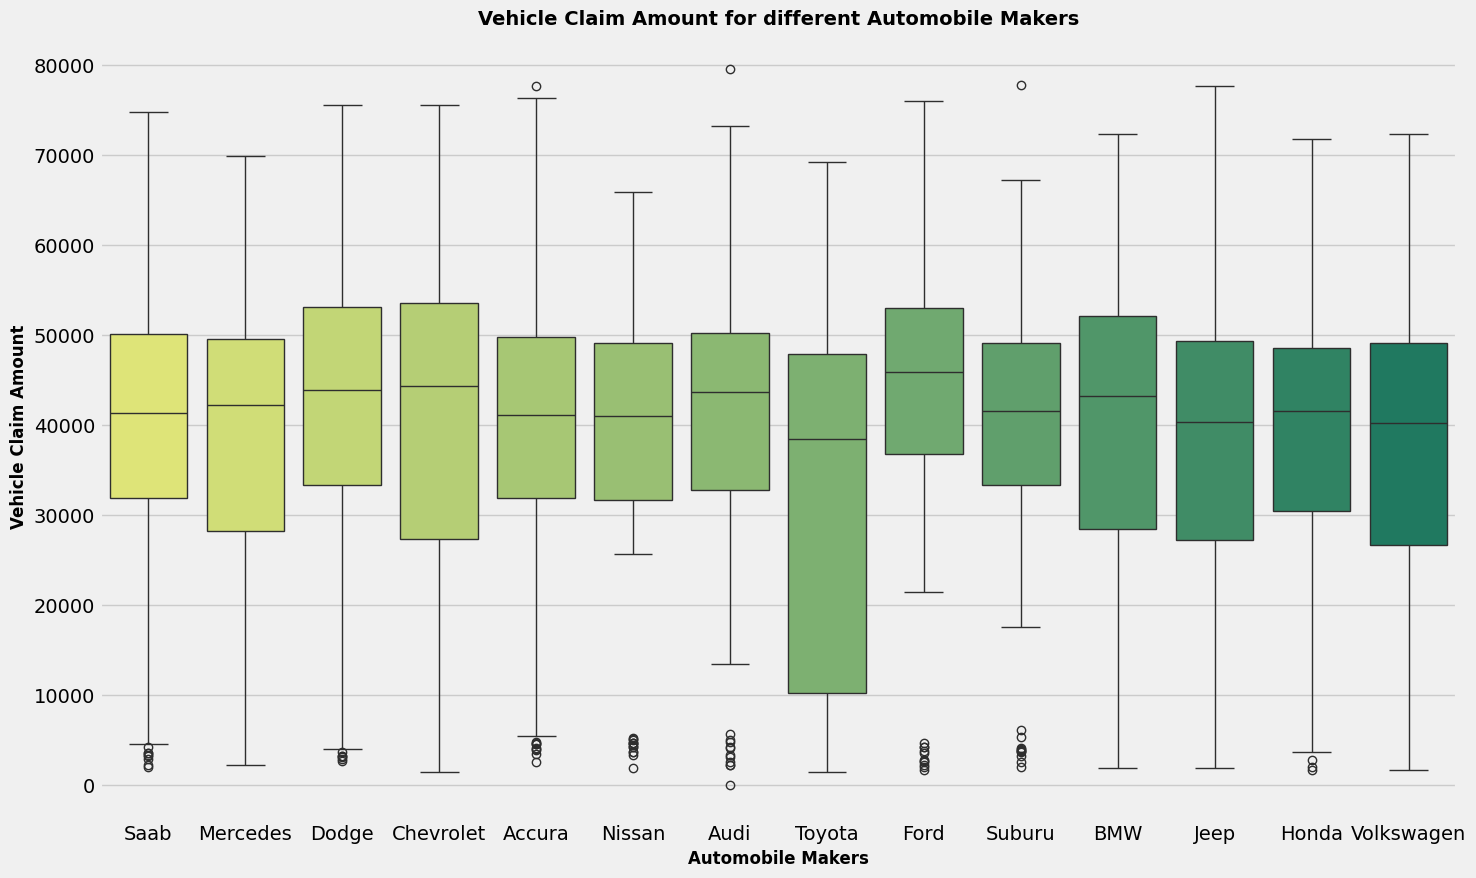

In [96]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(x = df['auto_make'], y = df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=14,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=12,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=12,fontweight='bold')
plt.show()

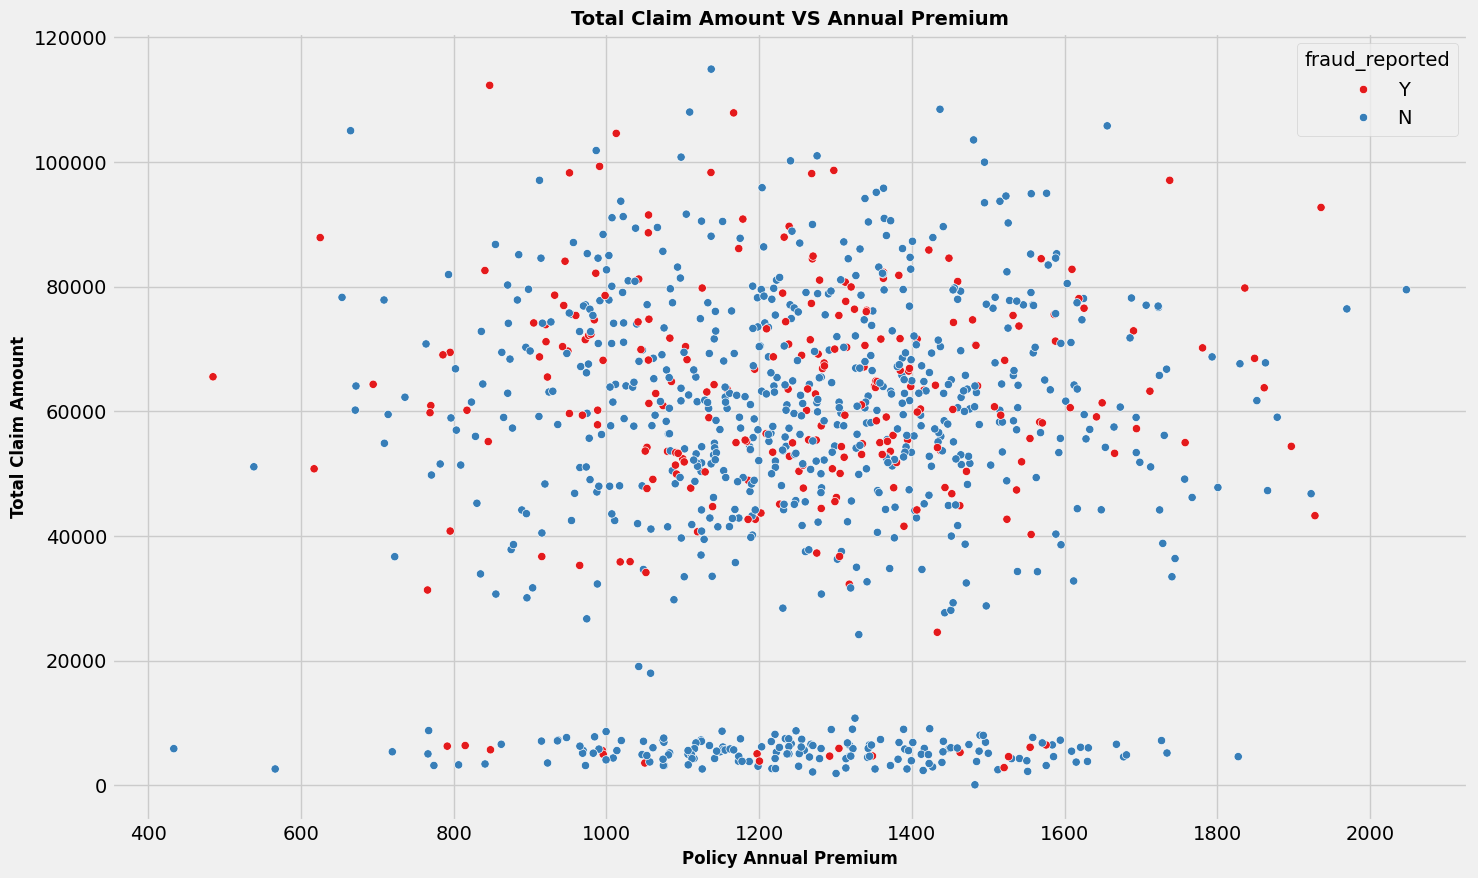

In [97]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x = df['policy_annual_premium'], y = df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=14,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=12,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=12,fontweight='bold')
plt.show()

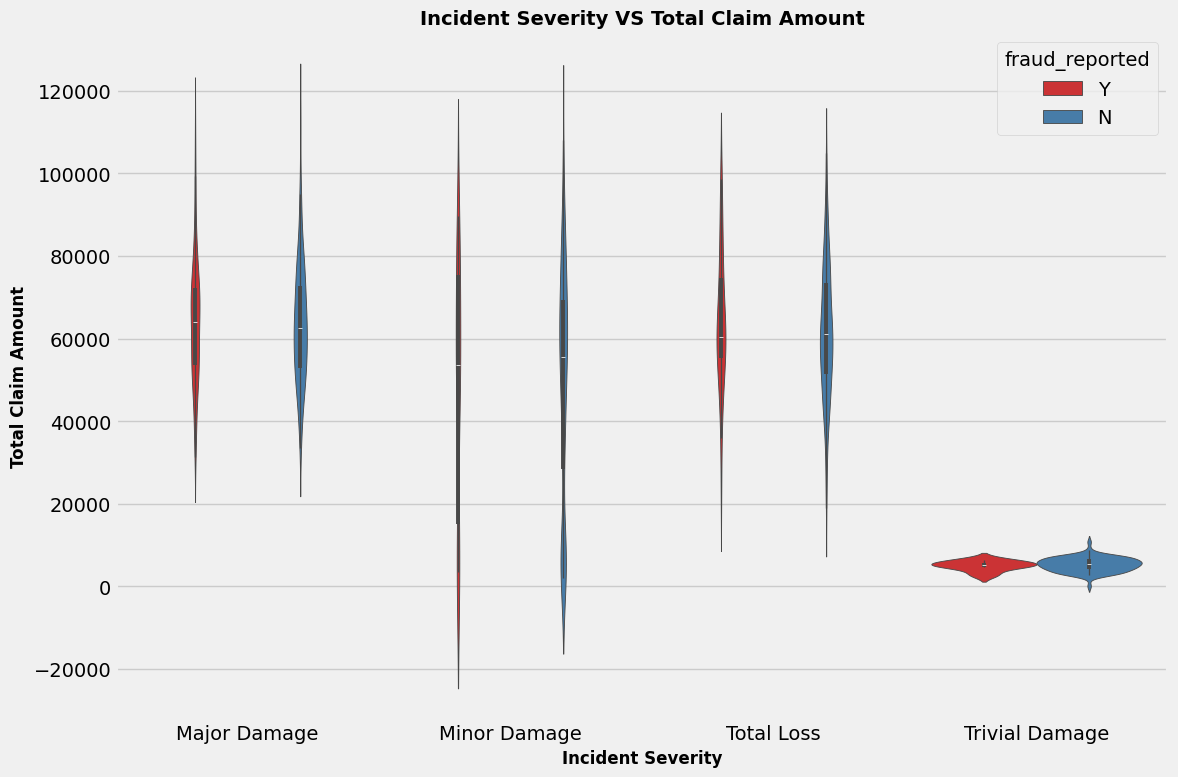

In [98]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(x = df['incident_severity'], y = df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=14,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=12,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=12,fontweight='bold')
plt.show()

In [99]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  incident_state incident_city  incident_hour_of_the_day  \
0             SC      Columbus                         5   
1             VA     Riverwood                         8   
2             NY      Columbus                         7   
3             OH     Arlington                         5   
4             NY     Arlington                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                      NO                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model fraud_reported CSL_Personal  \
0          52080       Saab        92x              Y          250   
1           3510   Mercedes       E400              Y          250   
2          23100      Dodge        RAM              N          100   
3          50720  Chevrolet      Tahoe              Y          250   
4           4550     Accura        RSX              N          500   

  CSL_Accidental  policy_bind_day  policy_bind_month  policy_bind_year  \
0            500               17                 10              2014   
1            500               27                  6              2006   
2            300                6                  9              2000   
3            500               25                  5              1990   
4           1000                6                  6              2014   

   incident_day  incident_month  Automob

### Encoding categorical data

In [100]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [101]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  incident_state  incident_city  \
0               2                  0               4              1   
1               1                  1               5              5   
2               1                  1               1              1   
3               0                  0               2              0   
4               1                  1               1              0   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                1   
1                         8                            1                0   
2                         7                            3                0   
3                         5                            1                0   
4                        20                            1                0   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        1               71610   
1                0          0                        0                5070   
2                2          3                        0               34650   
3                1          2                        0               63400   
4                0          1                        0                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080         10           1   
1           780             780           3510          8          12   
2          7700            3850          23100          4          30   
3          6340            6340          50720          3          34   
4          1300             650           4550          0          31   

   fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0               1             1               2               17   
1               1             1               2               27   
2               0             0               1                6   
3               1             1               2               25   
4               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25               1   
1                  6              2006            21               1   
2                  9        

In [102]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], float64: ['policy_annual_premium']}

## Feature selection and Engineering

### 1. Outliers Detection and Removal

In [103]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [104]:
len(Numerical)

21

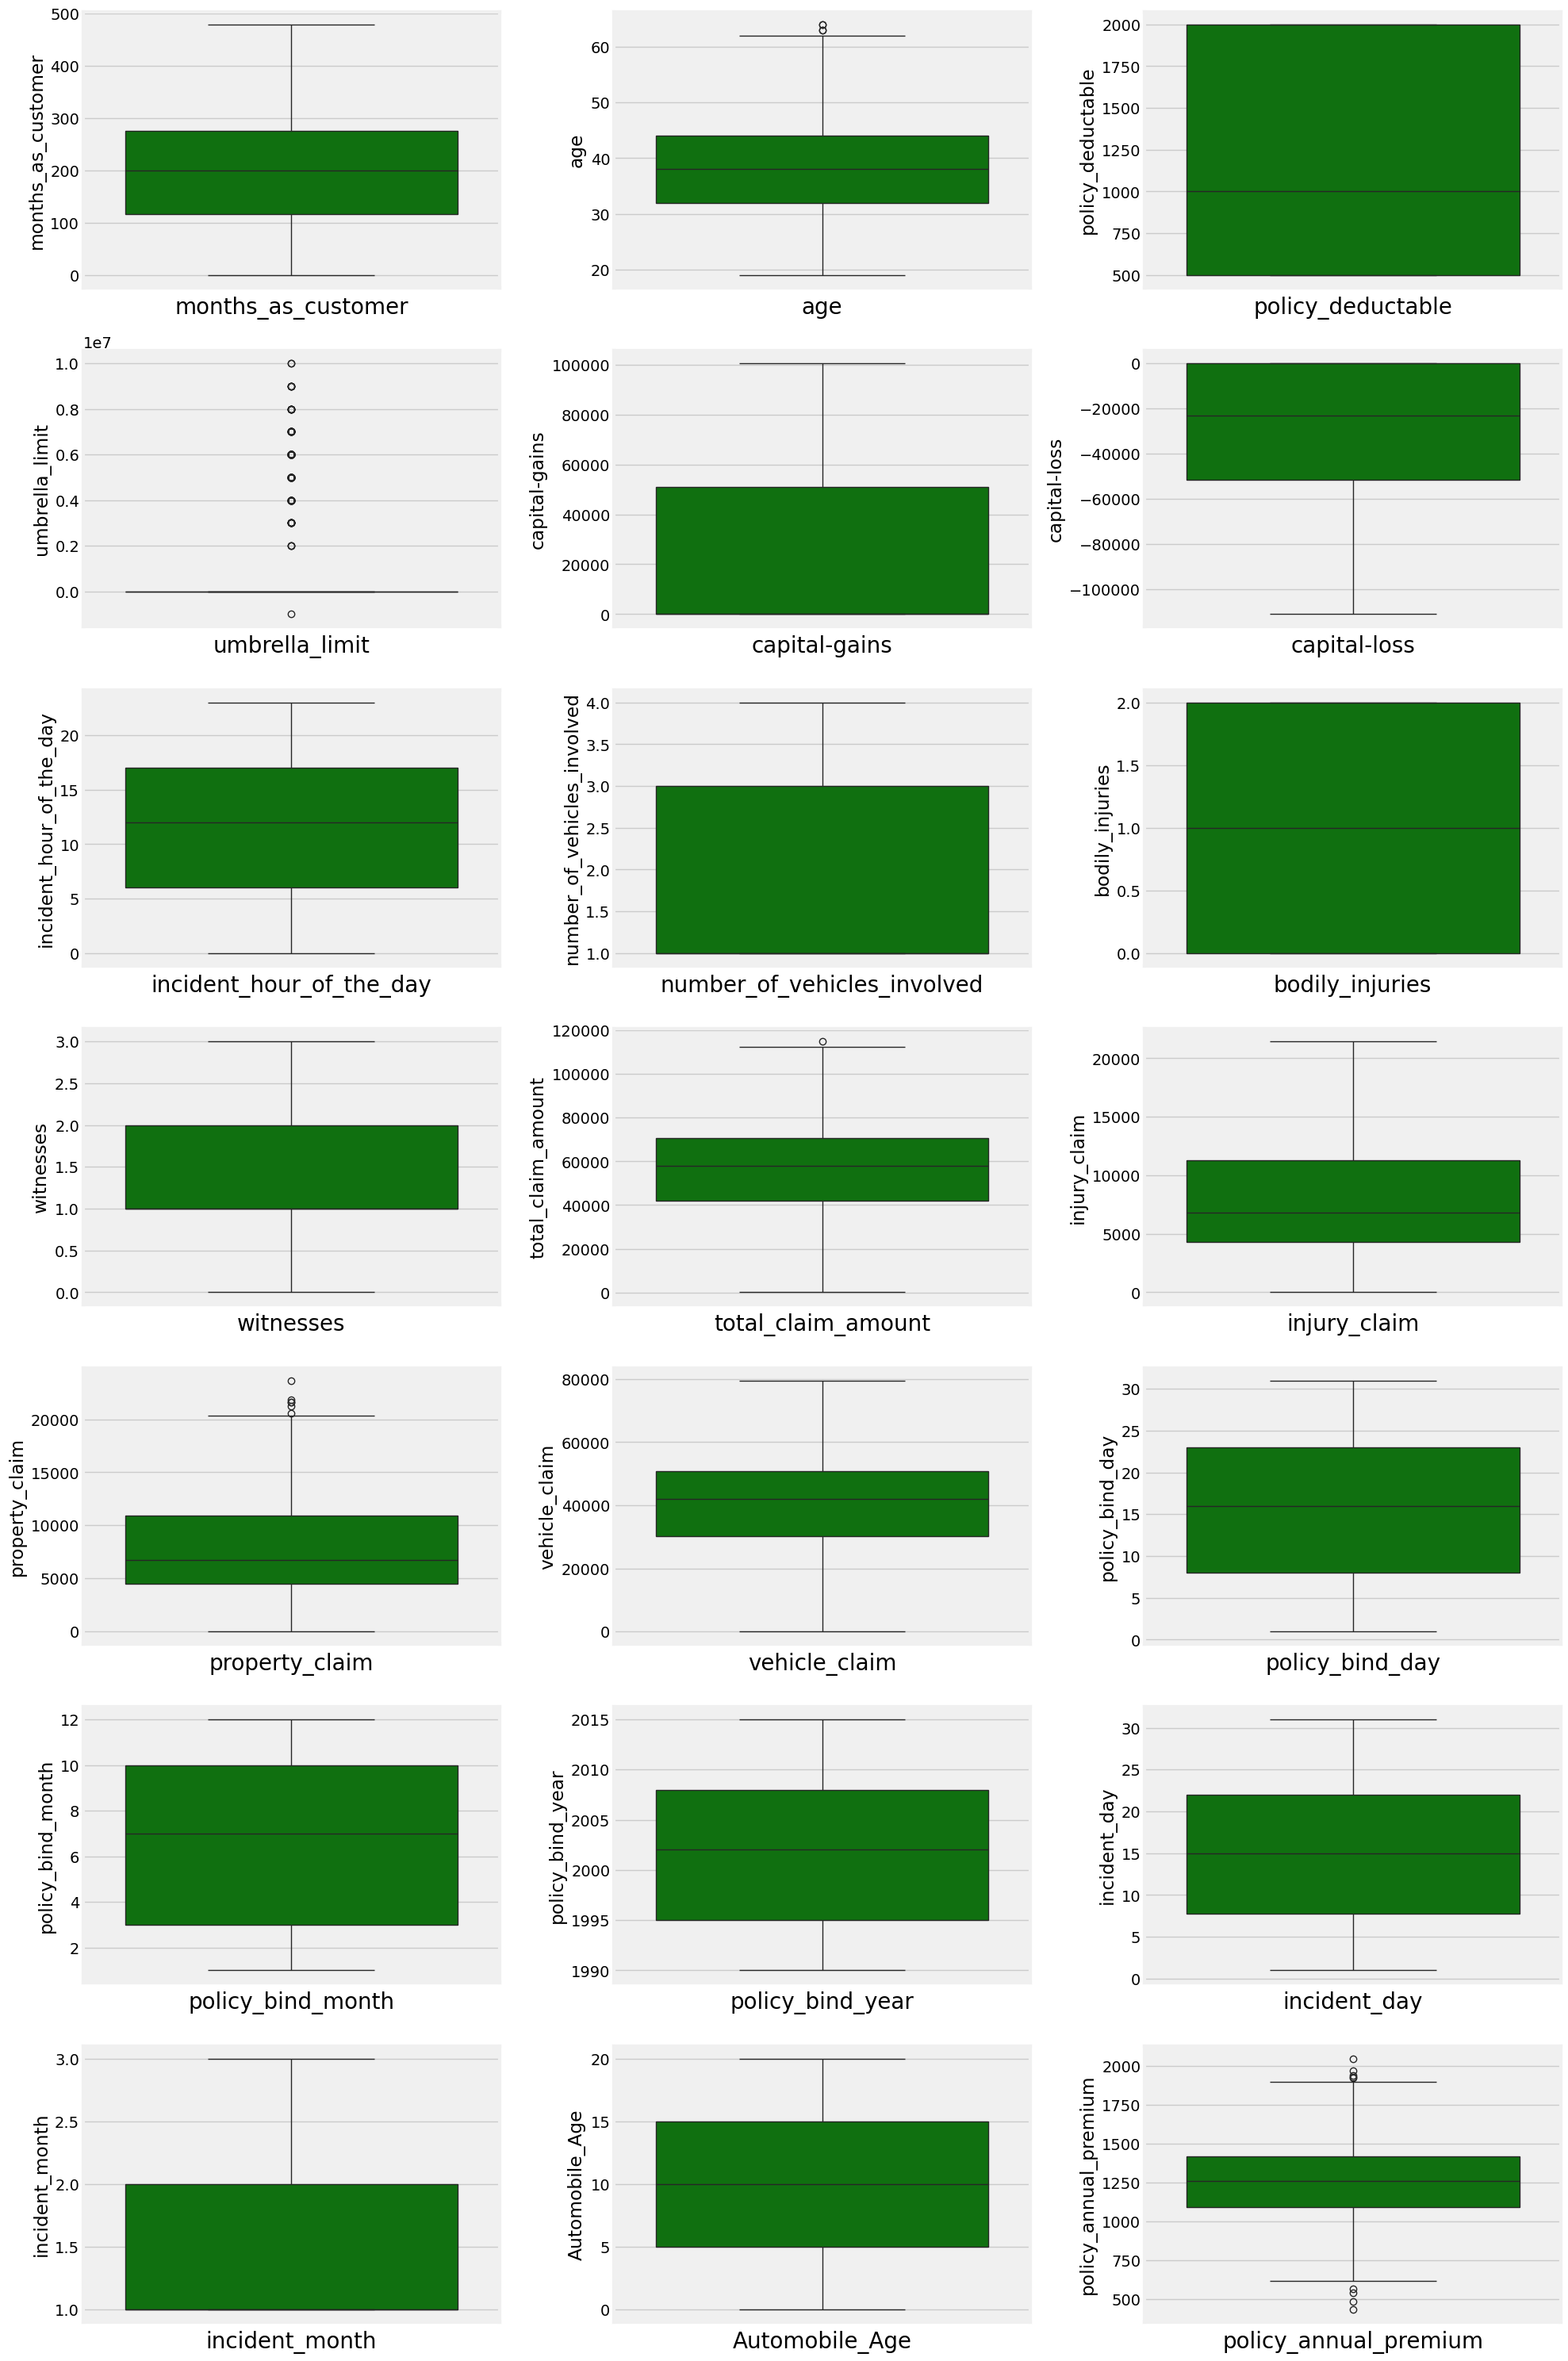

In [105]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### From Boxplot we can see outliers exist dataset.

#### Outliers removal using Zscore method

In [106]:
from scipy.stats import zscore

df_numeric = df.select_dtypes(include=[float, int])
z = np.abs(zscore(df_numeric))
threshold = 3
df1 = df[(z < threshold).all(axis=1)]
print("Shape of the dataframe before removing outliers: ", df.shape)
print("Shape of the dataframe after removing outliers: ", df1.shape)
print("Percentage of data loss post outlier removal: ", (df.shape[0] - df1.shape[0]) / df.shape[0] * 100)

df = df1.copy()

Shape of the dataframe before removing outliers:  (1000, 39)
Shape of the dataframe after removing outliers:  (980, 39)
Percentage of data loss post outlier removal:  2.0


### 2. Skewness of features

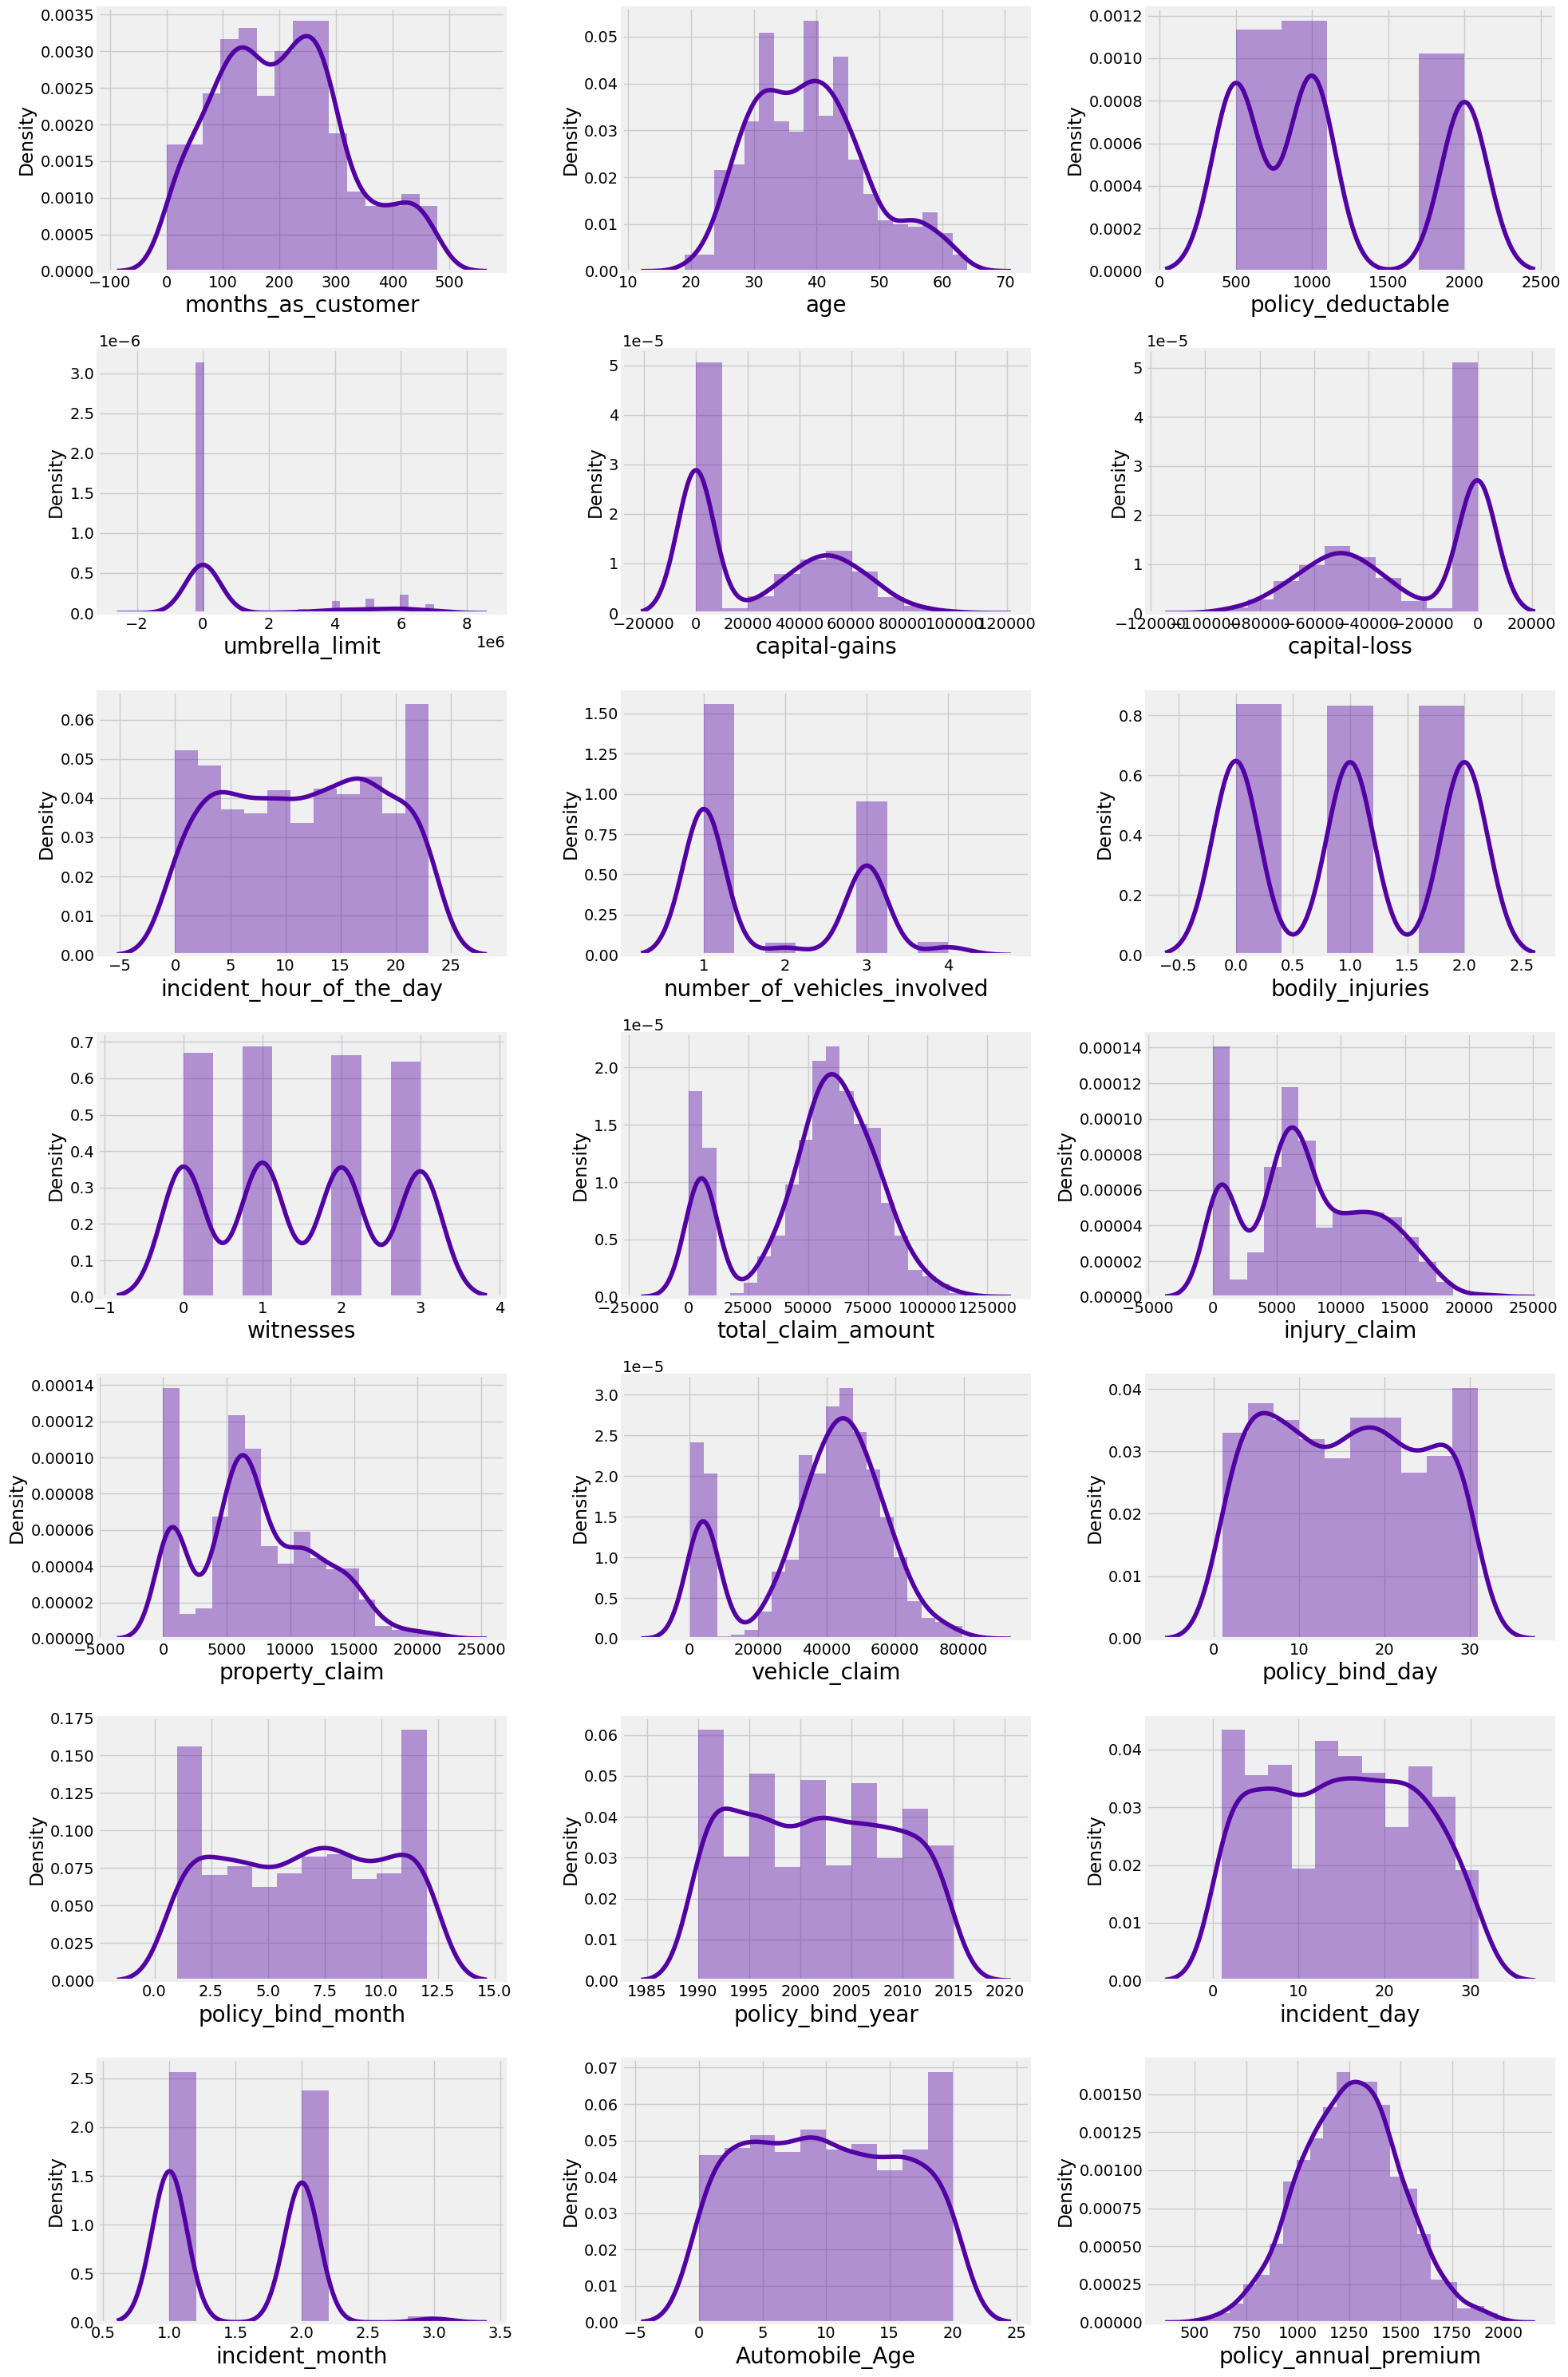

In [107]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

##### Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

##### We also going to ignore sknewness in target feature.

In [108]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.054173
policy_bind_month             -0.029021
policy_bind_year               0.065022
incident_day                   0.037814
incident_month                 0.259907
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

We will use yeo-johnson method to transform negatively skewed data.

In [109]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

#### Checking Skewness after transformation

In [110]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

##### For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced

### 3. Corrleation

In [111]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
CSL_Personal                          -0.021855 -0.013323      0.001653   
CSL_Accidental                         0.007121  0.011258      0.029007   
policy_bind_day                        0.055263  0.057361      0.011512   
policy_bind_month                     -0.007080  0.003470      0.041076   
policy_bind_year                      -0.041914 -0.031709     -0.003045   
incident_day                          -0.002511  0.002183      0.028847   
incident_month                        -0.048064 -0.038622      0.016468   
Automobile_Age                        -0.000869 -0.005594      0.001160   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capital-loss                         -0.019601               0.033133   
incide

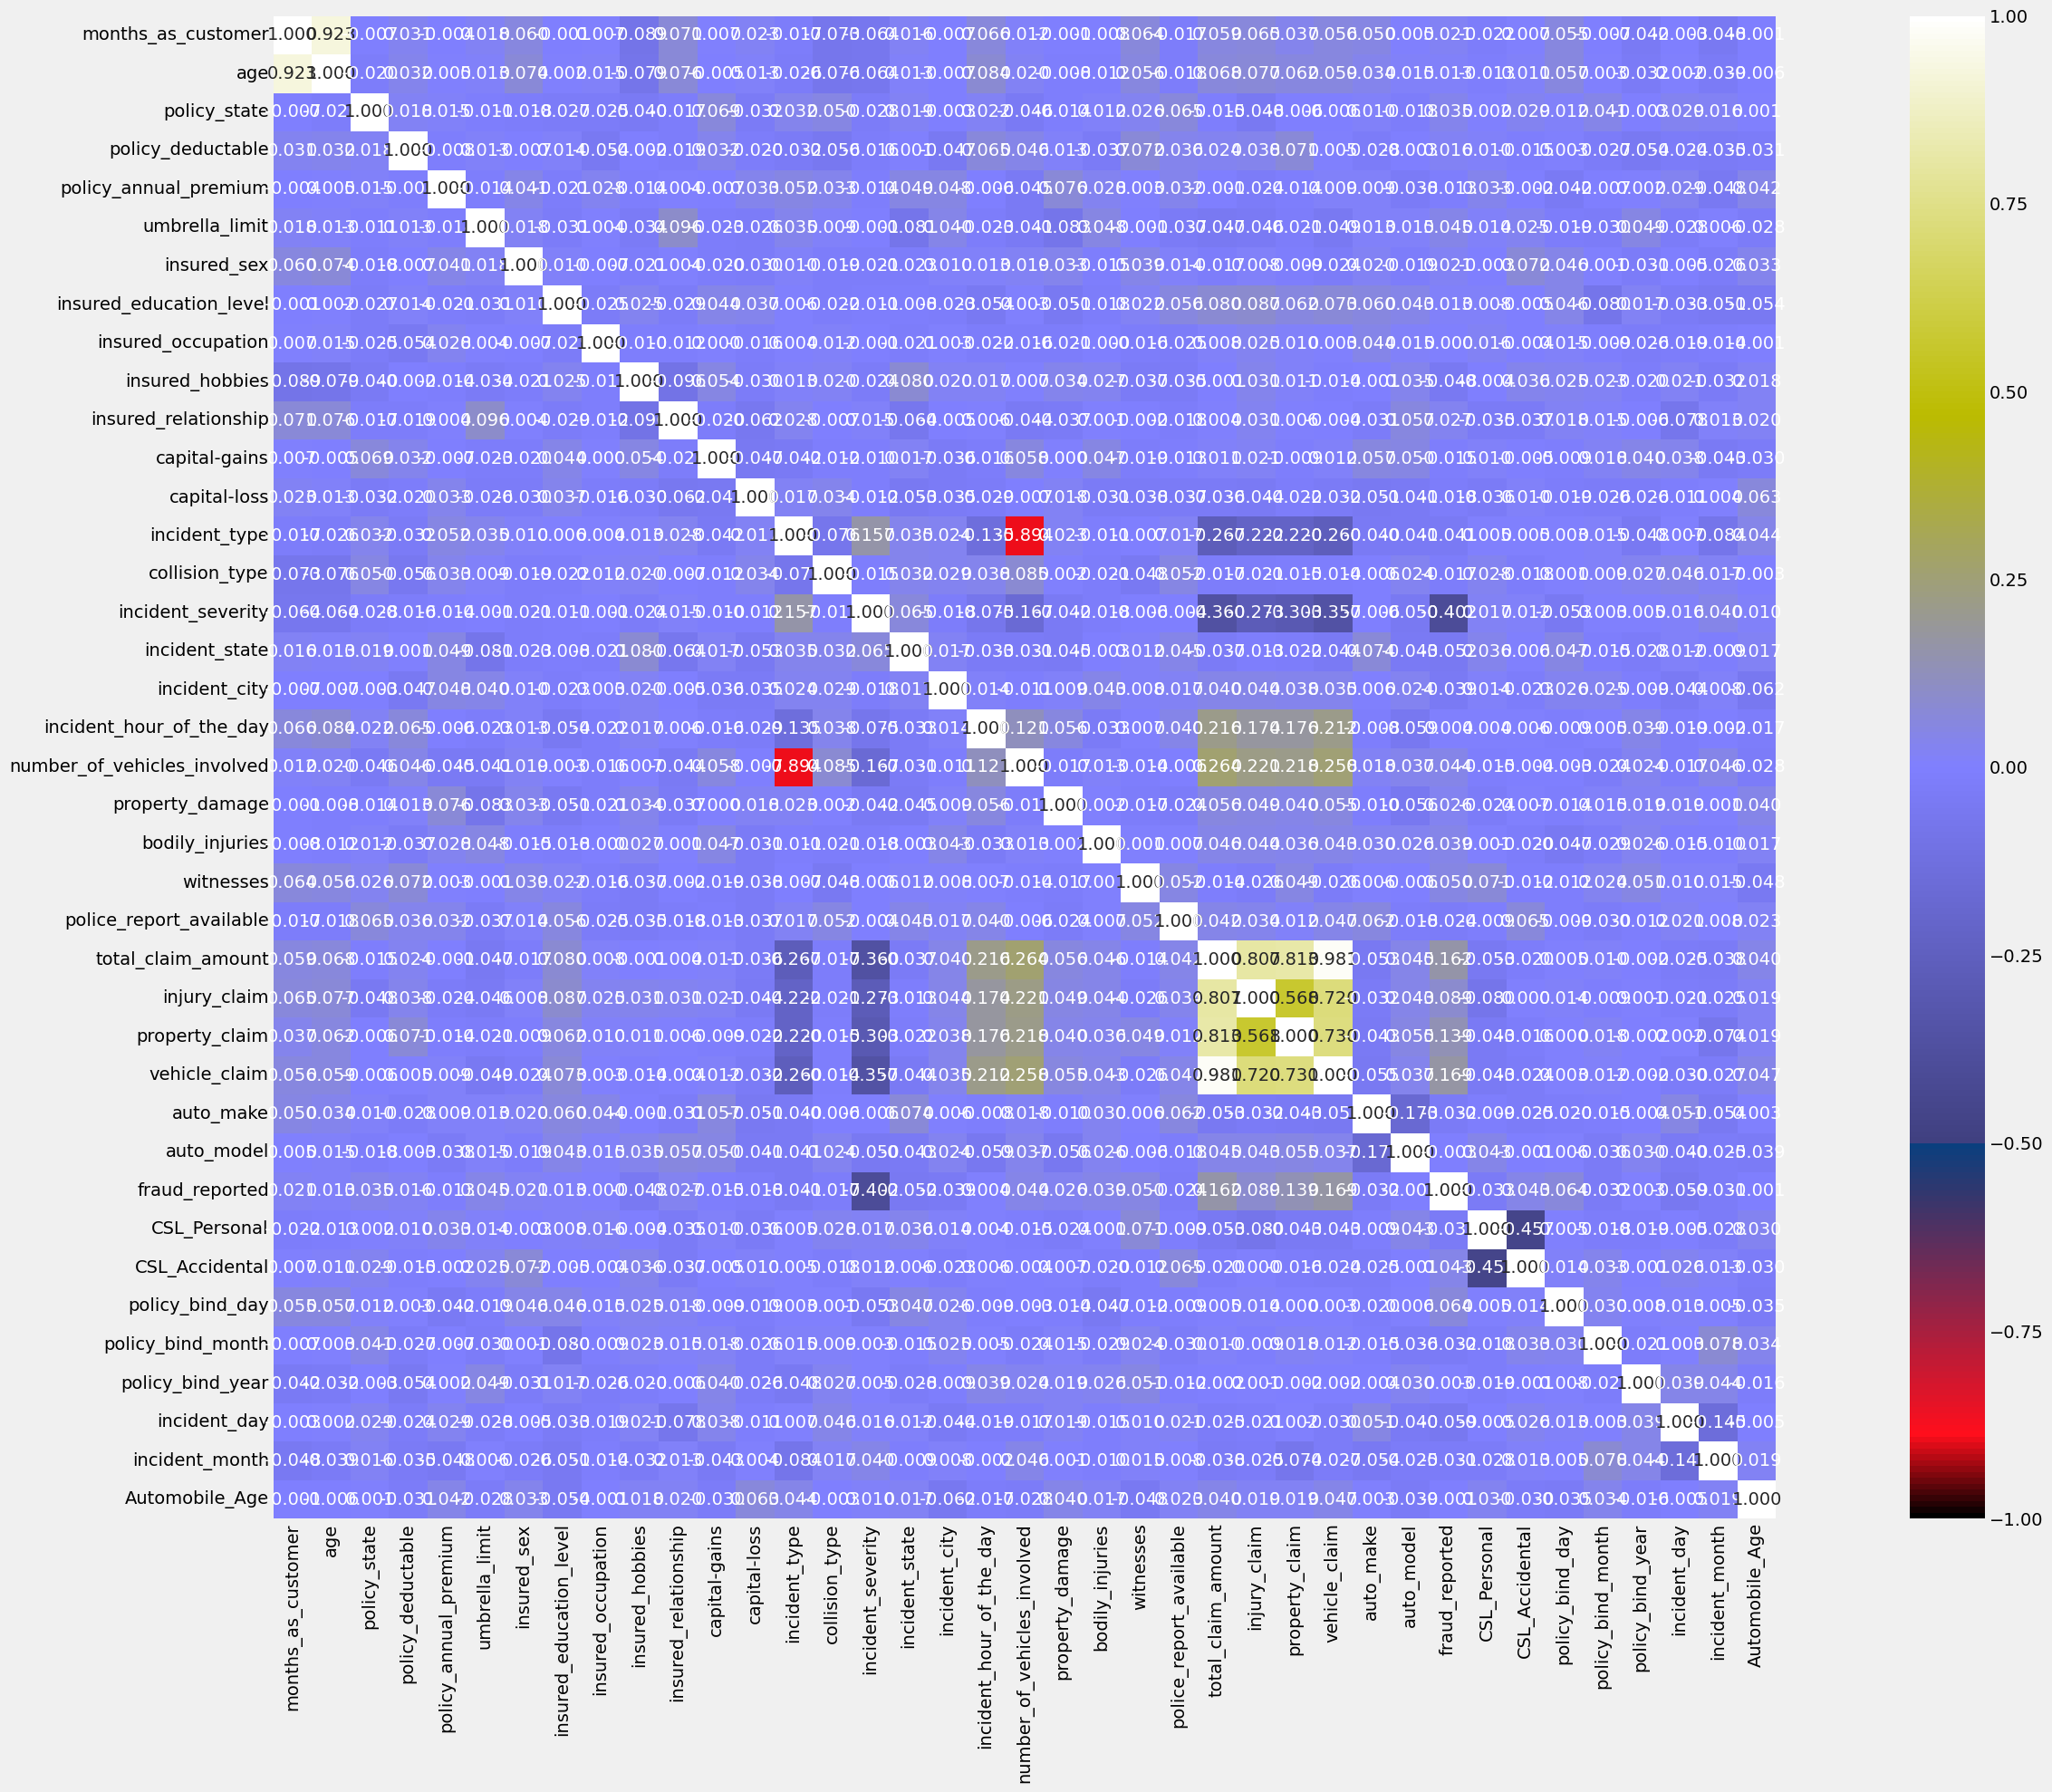

In [112]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

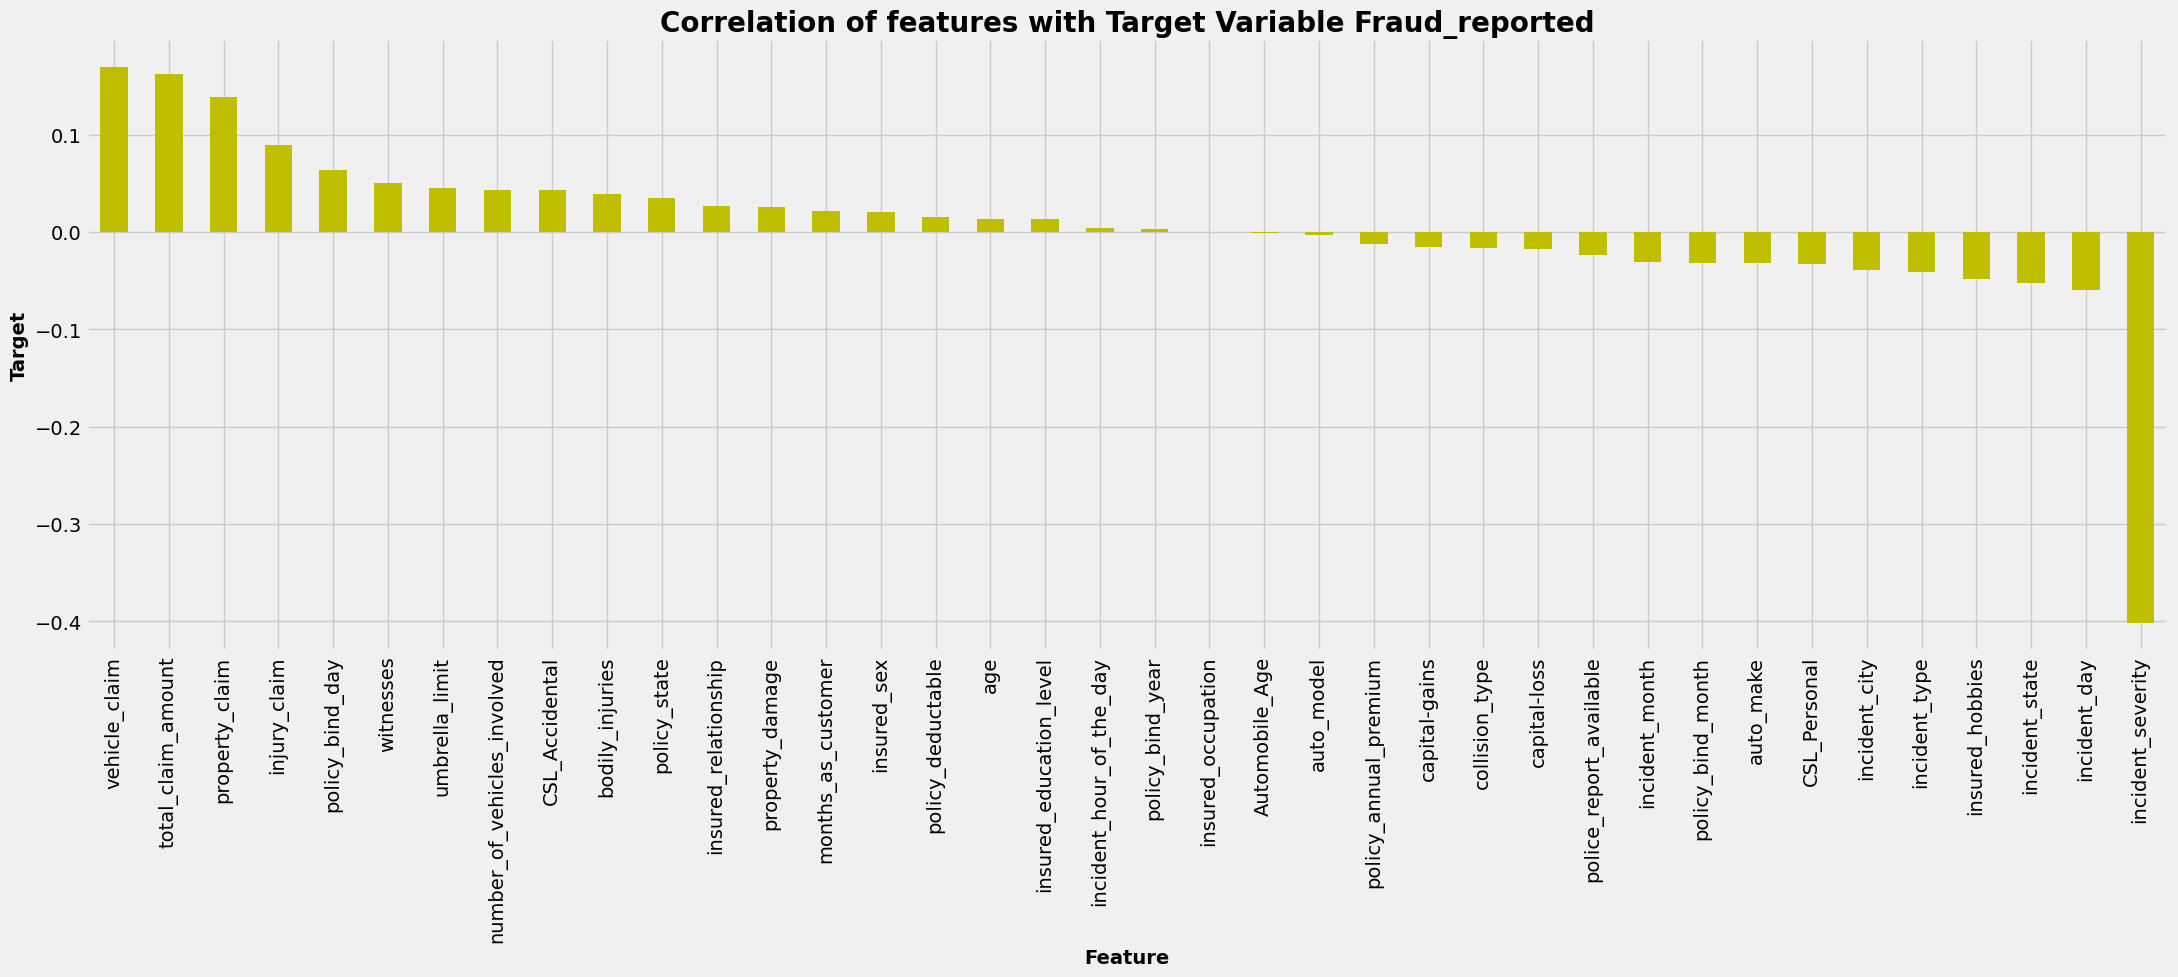

In [113]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

<b>Observation:</b>

1. incident_severity is hignly not correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.

2. Other variable are poorly correlated with target variable.

3. injury_claim,property_claim,vehicle_claim are highly correlated with each other.

4. incident_hour_of_the_day is highly negative correlated with incident type.

### 4. Balanceing Imbalanced target feature

In [114]:
df.fraud_reported.value_counts()

fraud_reported
0    740
1    240
Name: count, dtype: int64

##### As Target variable data is Imbalanced in nature we will need to balance target variable.

#### Balancing using SMOTE

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [117]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [118]:
Y.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

##### We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

### Standard Scaling

In [119]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

#### 5. Checking Multicollinearity between features using variance_inflation_factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       7.577923           months_as_customer
1       7.506171                          age
2       1.054980                 policy_state
3       1.068344            policy_deductable
4       1.044910        policy_annual_premium
5       1.061849               umbrella_limit
6       1.068360                  insured_sex
7       1.069733      insured_education_level
8       1.027605           insured_occupation
9       1.079509              insured_hobbies
10      1.067481         insured_relationship
11      1.060651                capital-gains
12      1.070518                 capital-loss
13      3.618709                incident_type
14      1.111808               collision_type
15      1.386996            incident_severity
16      1.066815               incident_state
17      1.060364                incident_city
18      1.103371     incident_hour_of_the_day
19      3.474895  number_of_vehicles_involved
20      1.074468              property_damage
21      1.052772              bodily_injuries
22      1.075062                    witnesses
23      1.102663      police_report_available
24  41624.612722           total_claim_amount
25   1680.976440                 injury_claim
26   1689.255607               property_claim
27  20482.215563                vehicle_claim
28      1.088679                    auto_make
29      1.087452                   auto_model
30      1.244588                 CSL_Personal
31      1.226404               CSL_Accidental
32      1.041136              policy_bind_day
33      1.050008            policy_bind_month
34      1.042094             policy_bind_year
35      1.071127                 incident_day
36      1.118388               incident_month
37      1.065089               Automobile_Age

<b>Strategy to Address Multicollinearity :</b>

1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.

2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

##### We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.

### PCA

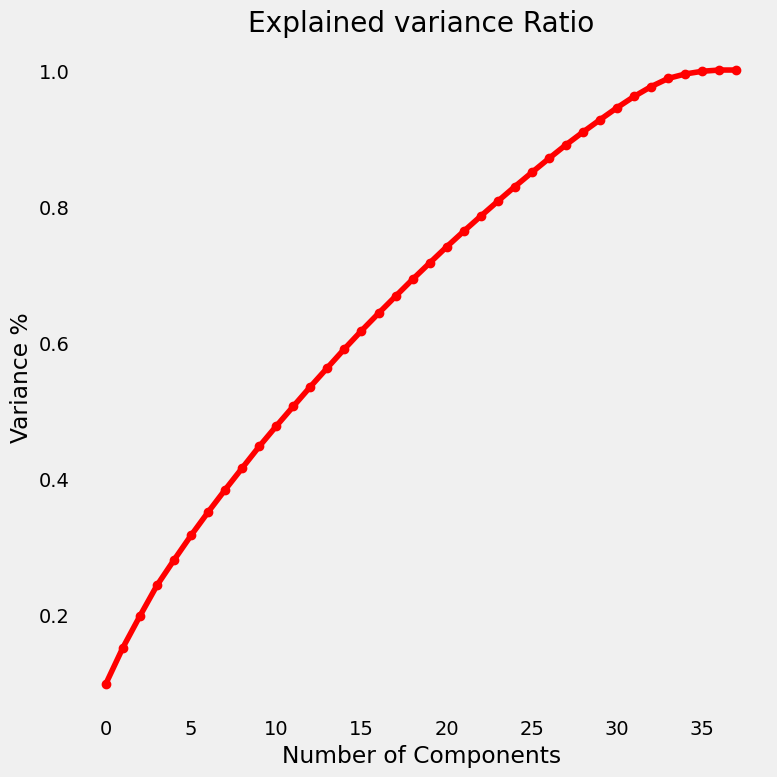

In [122]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()
plt.show()

<b>Comment -</b>

AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [123]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [124]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

## Machine Learning Model Building

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=89, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1110, 28)
Training target vector size: (1110,)
Test feature matrix size: (370, 28)
Test target vector size: (370,)


#### Finding best Random state

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.25, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8297297297297297 on Random_state 187


In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7905405405405406


Confusion matrix of Logistics Regression : 
 [[172  55]
 [ 38 179]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       227
           1       0.76      0.82      0.79       217

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444



In [129]:
# Finding Optimal value of n_neighbors for KNN

from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(18):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4931969619160719
RMSE value for k=  2 is: 0.4625623892665334
RMSE value for k=  3 is: 0.5241896362718123
RMSE value for k=  4 is: 0.497742652128334
RMSE value for k=  5 is: 0.5431804903022982
RMSE value for k=  6 is: 0.5067117097095317
RMSE value for k=  7 is: 0.5493649076905093
RMSE value for k=  8 is: 0.5220368976638744
RMSE value for k=  9 is: 0.5615294429638711
RMSE value for k=  10 is: 0.5493649076905093
RMSE value for k=  11 is: 0.5554804754071547
RMSE value for k=  12 is: 0.5534494613840601
RMSE value for k=  13 is: 0.5635313368106227
RMSE value for k=  14 is: 0.5390181263561927
RMSE value for k=  15 is: 0.5595203866375765
RMSE value for k=  16 is: 0.5431804903022982
RMSE value for k=  17 is: 0.5615294429638711
RMSE value for k=  18 is: 0.5534494613840601


<b>Comment-</b>

At k=2, we get the minimum RMSE value which approximately 0.46256, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

### Applying other classification algorithm

In [132]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7905405405405406


Confusion matrix : 
 [[172  55]
 [ 38 179]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       227
           1       0.76      0.82      0.79       217

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8288288288288288


Confusion matrix : 
 [[190  37]
 [ 39 178]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       227
           1       0.83      0.82      0.82       217

    accuracy                           0.83       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.83      0.83      0.83     

## CrossValidation :

In [133]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.61824324 0.69594595 0.83445946 0.84797297 0.84121622]
Mean Score : 0.7675675675675675
Std deviation : 0.09358534969286912




Cross Validation Score SVC() :

Score : [0.56756757 0.74324324 0.89189189 0.90540541 0.92905405]
Mean Score : 0.8074324324324325
Std deviation : 0.1365132432964841




Cross Validation Score GaussianNB() :

Score : [0.57432432 0.71621622 0.86824324 0.87837838 0.89189189]
Mean Score : 0.7858108108108108
Std deviation : 0.12343986212615389




Cross Validation Score DecisionTreeClassifier() :

Score : [0.58783784 0.67567568 0.78040541 0.72972973 0.73648649]
Mean Score : 0.702027027027027
Std deviation : 0.06607817934269




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.68243243 0.72635135 0.74324324 0.76689189 0.76013514]
Mean Score : 0.7358108108108109
Std deviation : 0.030171775083467696




Cross Validation Score RandomForestClassifier() :

Score : [0.60810811 0.73986486 0.90

## Hyper Parameter Tuning : GridSearchCV

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [136]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=12)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=12)

In [137]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 400}

## Final Model

In [138]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 400, max_depth=20 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8536036036036037


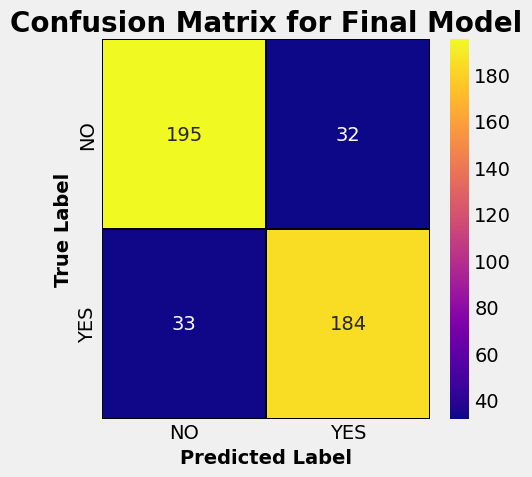

In [141]:
from sklearn.metrics import confusion_matrix
Matrix = confusion_matrix(Y_test, y_pred)  # Confusion matrix

x_labels = ["NO", "YES"]  # Labels for the x-axis
y_labels = ["NO", "YES"]  # Labels for the y-axis
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(Matrix, annot=True, linewidths=.2, linecolor="black", fmt=".0f", ax=ax, 
            cmap="plasma", xticklabels=x_labels, yticklabels=y_labels)

plt.xlabel("Predicted Label", fontsize=14, fontweight='bold')
plt.ylabel("True Label", fontsize=14, fontweight='bold')
plt.title('Confusion Matrix for Final Model', fontsize=20, fontweight='bold')

plt.show()

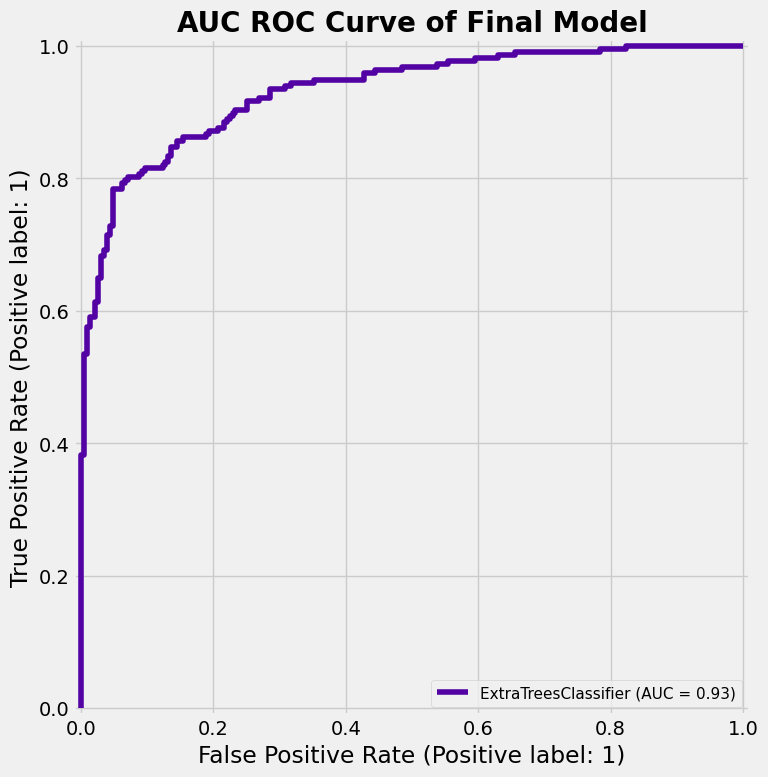

AUC Score:  0.8534785521427556


In [143]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

roc_disp = RocCurveDisplay.from_estimator(Final_mod, X_test, Y_test)
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AUC ROC Curve of Final Model', fontsize=20, fontweight='bold')

plt.show()

auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m' + 'AUC Score: ' + '\033[0m', auc_score)


## Saving model

In [144]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']

### Predicting the Final Model

In [145]:
# Prediction
prediction = Final_mod.predict(X_test)

In [146]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

Predicted Values  Actual Values
0                 1              1
1                 0              0
2                 0              0
3                 1              1
4                 1              1